##  Course project Module 3 part 2 for Machine Learning

## Housing Prices in the city of Ames in Iowa


## EPFL Extension School                                 

####  Data source : Dean De Cock                                  
####  By Joker
- started: 18.06.2019
- finished: 14.07.2019

# Data overview and course project aim

#### ARTICLE TITLE: Ames Iowa: Alternative to the Boston Housing Data Set

#### DESCRIPTIVE ABSTRACT:

- Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

#### VARIABLE DESCRIPTIONS:
- Coma characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

- Order (Discrete): Observation number

- PID (Nominal): Parcel identification number  - can be used with city web site for parcel review.


### Aim of the project:
- The idea is to use the 2,430 observations from house-prices.csv to create and evaluate different models, and then use the best one to estimate the prices of the remaining 500 houses from house-prices-test.csv.



In [1]:
# libraries importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
sns.set_style("whitegrid")
%matplotlib inline
import warnings


# Allow to extend the Df display by bypassing the auto adjustment
pd.set_option("display.max_columns",200); pd.set_option('display.max_rows', 1000)

# Allow to extend the NB display width to screen size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ---------------------------------------------------------------------------------------------------------------

# --------------------------------- DATA PREPROCESSING start ----------------------------------

# ---------------------------------------------------------------------------------------------------------------

# Data Exploration

- Mainly control the correct data loading, data type, first quick look at missing values
- Gather columns names for a quick view
- Check duplicate

In [2]:
# Load data -> Description says it is Tab separated, but it is csv.
df_Train = pd.read_csv('house-prices\house-prices.csv'); df_Pred = pd.read_csv('house-prices\house-prices-test.csv')
# Data exploration - to know the data set
print('df_Train shape: ', df_Train.shape,'\n'); df_Train.info(); df_Train.head()

df_Train shape:  (2430, 82) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
Order              2430 non-null int64
PID                2430 non-null int64
MS SubClass        2430 non-null int64
MS Zoning          2430 non-null object
Lot Frontage       2010 non-null float64
Lot Area           2430 non-null int64
Street             2430 non-null object
Alley              163 non-null object
Lot Shape          2430 non-null object
Land Contour       2430 non-null object
Utilities          2430 non-null object
Lot Config         2430 non-null object
Land Slope         2430 non-null object
Neighborhood       2430 non-null object
Condition 1        2430 non-null object
Condition 2        2430 non-null object
Bldg Type          2430 non-null object
House Style        2430 non-null object
Overall Qual       2430 non-null int64
Overall Cond       2430 non-null int64
Year Built         2430 non-null int64
Year Remod/Add     2430 non-nu

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           NaN      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4   NaN       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      2Story             7             5   
1        Norm        Norm      1Fam      1Story             6             6   
2        Norm        Norm     Twnhs      2Story             4             5   
3        Norm        Norm      1Fam      1Story             5             5   
4       Feedr        Norm    2fmCon      2.5Unf             7             4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        652.0          952.0    GasA         Ex           Y   
1           0.0        216.0          216.0    GasA         TA           Y   
2           0.0        546.0          546.0    GasA         Fa           Y   
3           0.0        380.0         1398.0    GasA         Gd           Y   
4           0.0        925.0          925.0    GasA         TA           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              4   
1             0.0             0.0          1          1              2   
2             0.0             0.0          1          1              3   
3             0.0             1.0

In [3]:
# Data exploration - to know the data set
print('df_Pred shape: ',df_Pred.shape,'\n'); df_Pred.info(); df_Pred.head()

df_Pred shape:  (500, 81) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 81 columns):
Order              500 non-null int64
PID                500 non-null int64
MS SubClass        500 non-null int64
MS Zoning          500 non-null object
Lot Frontage       430 non-null float64
Lot Area           500 non-null int64
Street             500 non-null object
Alley              35 non-null object
Lot Shape          500 non-null object
Land Contour       500 non-null object
Utilities          500 non-null object
Lot Config         500 non-null object
Land Slope         500 non-null object
Neighborhood       500 non-null object
Condition 1        500 non-null object
Condition 2        500 non-null object
Bldg Type          500 non-null object
House Style        500 non-null object
Overall Qual       500 non-null int64
Overall Cond       500 non-null int64
Year Built         500 non-null int64
Year Remod/Add     500 non-null int64
Roof Style       

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   2217  909279080           50        RL           NaN     11275   Pave   
1    837  907126050           20        RL          65.0      9757   Pave   
2   2397  528144030           60        RL          86.0     11065   Pave   
3   1963  535452060           20        RL          70.0      7000   Pave   
4    306  911202100           50   C (all)          66.0      8712   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          HLS    AllPub     Corner        Mod      Crawfor   
1   NaN       Reg          Low    AllPub     Inside        Mod      CollgCr   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      NridgHt   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
4  Pave       Reg          HLS    AllPub     Inside        Mod       IDOTRR   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1.5Fin             6             7   
1        Norm        Norm      1Fam      1Story             5             7   
2        Norm        Norm      1Fam      2Story             8             5   
3        Norm        Norm      1Fam      1Story             5             7   
4        Norm        Norm      1Fam      1.5Fin             4             7   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1932            1950      Gable   CompShg      MetalSd      MetalSd   
1        1994            1994      Gable   CompShg      VinylSd      VinylSd   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1960            2002      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1900            1950      Gable   CompShg      MetalSd      MetalSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         480.0         TA         TA     CBlock        TA   
1         None           0.0         TA         Gd      PConc        TA   
2        Stone         788.0         Gd         TA      PConc        Gd   
3      BrkFace          45.0         TA         TA     CBlock        TA   
4         None           0.0         TA         TA      Stone        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            Mn            Rec         297.0            LwQ   
1        TA            No            ALQ         755.0            Unf   
2        TA            Mn            Unf           0.0            Unf   
3        TA            No            Rec         588.0            Unf   
4        TA            Mn            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0         557.0          0.0          854.0    GasA         TA           Y   
1           0.0        235.0          990.0    GasA         Ex           Y   
2           0.0       1085.0         1085.0    GasA         Ex           Y   
3           0.0        422.0         1010.0    GasA         Ex           Y   
4           0.0        859.0          859.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1096         895                0         1991   
1      SBrkr         990           0                0          990   
2      SBrkr        1120         850                0         1970   
3      SBrkr        1134           0                0         1134   
4      SBrkr         859         319                0         1178   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          1          1              3   
1             1.0             0.0          1          0              3   
2             0.0             0.0          2          1              3   
3             0.0             0.0

In [4]:
# Dataset exploration - quick overview of the columns names
Columns_name=df_Train.columns.values.tolist()
# Add 7 times NaN in the list
for i in range (8):
    Columns_name.append('NaN')

# Create the array that matches the screen
array_col=np.array(Columns_name); a=np.reshape(array_col,(9,10))

# Create the new DataFrame based on the pre defined array
df_col=pd.DataFrame(a, columns=(1,2,3,4,5,6,7,8,9,10)); df_col

1               2              3              4   \
0           Order             PID    MS SubClass      MS Zoning   
1       Utilities      Lot Config     Land Slope   Neighborhood   
2      Year Built  Year Remod/Add     Roof Style      Roof Matl   
3      Foundation       Bsmt Qual      Bsmt Cond  Bsmt Exposure   
4         Heating      Heating QC    Central Air     Electrical   
5       Full Bath       Half Bath  Bedroom AbvGr  Kitchen AbvGr   
6   Garage Yr Blt   Garage Finish    Garage Cars    Garage Area   
7      3Ssn Porch    Screen Porch      Pool Area        Pool QC   
8  Sale Condition       SalePrice            NaN            NaN   

               5              6                7             8   \
0    Lot Frontage       Lot Area           Street         Alley   
1     Condition 1    Condition 2        Bldg Type   House Style   
2    Exterior 1st   Exterior 2nd     Mas Vnr Type  Mas Vnr Area   
3  BsmtFin Type 1   BsmtFin SF 1   BsmtFin Type 2  BsmtFin SF 2   
4      1st Flr SF     2nd Flr SF  Low Qual Fin SF   Gr Liv Area   
5    Kitchen Qual  TotRms AbvGrd       Functional    Fireplaces   
6     Garage Qual    Garage Cond      Paved Drive  Wood Deck SF   
7           Fence   Misc Feature         Misc Val       Mo Sold   
8             NaN            NaN              NaN           NaN   

               9               10  
0       Lot Shape    Land Contour  
1    Overall Qual    Overall Cond  
2      Exter Qual      Exter Cond  
3     Bsmt Unf SF   Total Bsmt SF  
4  Bsmt Full Bath  Bsmt Half Bath  
5    Fireplace Qu     Garage Type  
6   Open Porch SF  Enclosed Porch  
7         Yr Sold       Sale Type  
8             NaN             NaN

In [5]:
# Check for duplicates -> uses column PID
def check_Dupli(df, *col):
    print ("{0} duplicated rows found in {1} column".format(df.duplicated(col).sum(), col))
    
# Check for duplicates rows based on the Parcel identification number
print('df_Train'); check_Dupli(df_Train,'PID'); print('\ndf_Pred');check_Dupli(df_Pred,'PID')

df_Train
0 duplicated rows found in ('PID',) column

df_Pred
0 duplicated rows found in ('PID',) column


In [41]:
# Dataset exploration - to know the dataset
# Create a function to do several checks about the columns of df
def Check_df(df):
    
    # Keep only numerical columns for outlier check
    df= df.select_dtypes(include=['int','int32','int64','float','float32','float64'])
    # Check0: if there are any missing values
    check0=df.isnull().sum().sort_values(); check0=pd.DataFrame(check0,columns=['# missing values'])
    # Check1: if there are any missing values
    check1=(df<0).sum(); check1=pd.DataFrame(check1,columns=['# values < 0'])
    # Check2: Inspection of the '0' values
    check2=(df==0).sum(); check2=pd.DataFrame(check2,columns=['# values = 0'])
    # Check3: Inspection of the values between 0&1
    check3=((df<1)^(df<=0)).sum(); check3=pd.DataFrame(check3,columns=['# 0 < values < 1'])
    # Display check0,1,2,3 results
    df_inspection=pd.concat([check0, check1, check2, check3], axis=1)
    return df_inspection.loc[(df_inspection!=0).any(axis=1)] # returns only info on columns that fail at least one test

# Data Rought Cleaning

In [7]:
# Dataset cleaning
# Columns with no value can be droped straight forward
df_Train.drop(columns=['Order'], inplace=True);
df_Pred.drop(columns=['Order'], inplace=True)
# Columns with a few values (< 30) can be droped straight forward as non statistically significant
df_Train1=df_Train.copy();
df_Train.dropna(thresh=30, axis=1, inplace=True);
RemovedColl=set(df_Train1.columns)-set(df_Train.columns)
df_Pred1=df_Pred.copy();
df_Pred.dropna(thresh=30, axis=1, inplace=True);
RemovedCol2=set(df_Pred1.columns)-set(df_Pred.columns)
print('df_Train shape: ',df_Train.shape, '     Removed col step 1: ', RemovedColl)
print('df_Pred shape: ',df_Pred.shape, '     Removed col step 1: ', RemovedCol2)

df_Train shape:  (2430, 80)      Removed col step 1:  {'Pool QC'}
df_Pred shape:  (500, 78)      Removed col step 1:  {'Misc Feature', 'Pool QC'}


In [8]:
# Dataset cleaning
# Columns with a few values (< 25%) can be droped straight forward as they have a few weight in the data information only.
# Is there any rule of the thumb to estimate that ratio ?
ratio=.25
Train_tresh_value=df_Train.shape[0]*ratio; Pred_tresh_value=df_Pred.shape[0]*ratio
df_Train1=df_Train.copy(); df_Train.dropna(thresh=Train_tresh_value, axis=1, inplace=True); RemovedCol3=set(df_Train1.columns)-set(df_Train.columns)
df_Pred1=df_Pred.copy(); df_Pred.dropna(thresh=Pred_tresh_value, axis=1, inplace=True); RemovedCol4=set(df_Pred1.columns)-set(df_Pred.columns)
print('df_Train shape: ',df_Train.shape, '     Removed col step 2: ', RemovedCol3)
print('df_Pred shape: ',df_Pred.shape, '     Removed col step 2: ', RemovedCol4)

df_Train shape:  (2430, 77)      Removed col step 2:  {'Misc Feature', 'Fence', 'Alley'}
df_Pred shape:  (500, 76)      Removed col step 2:  {'Fence', 'Alley'}


In [9]:
print('df_Train shape: ',df_Train.shape, '     Total Removed col: ', RemovedColl, RemovedCol3)
print('df_Pred shape: ',df_Pred.shape, '     Total Removed col: ', RemovedCol2, RemovedCol4)

df_Train shape:  (2430, 77)      Total Removed col:  {'Pool QC'} {'Misc Feature', 'Fence', 'Alley'}
df_Pred shape:  (500, 76)      Total Removed col:  {'Misc Feature', 'Pool QC'} {'Fence', 'Alley'}


## Data Visualisation

- It's always good to see the data

C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


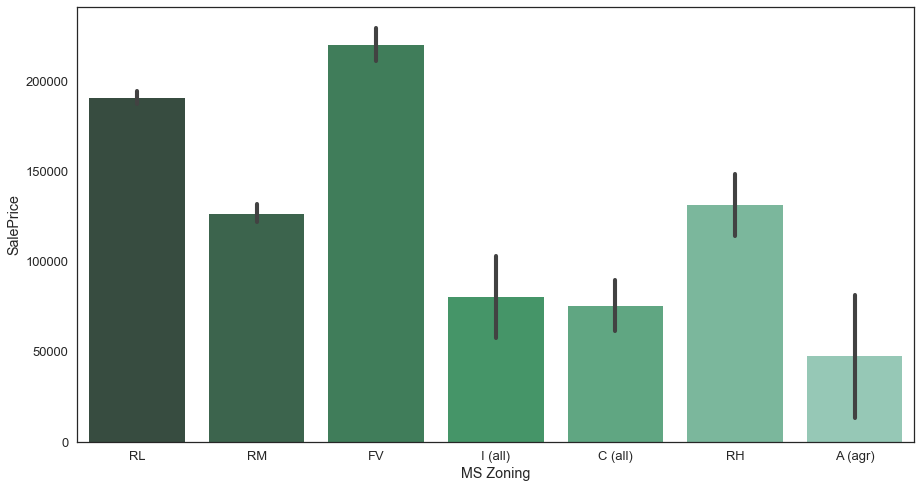

In [10]:
# Make some plots of the data to explore and practice using seaborn
# Arrange graphic
fig = plt.figure(figsize=(15,8)); sns.set(style="white", context="talk")
sns.barplot(df_Train['MS Zoning'], df_Train['SalePrice'], palette="BuGn_d");

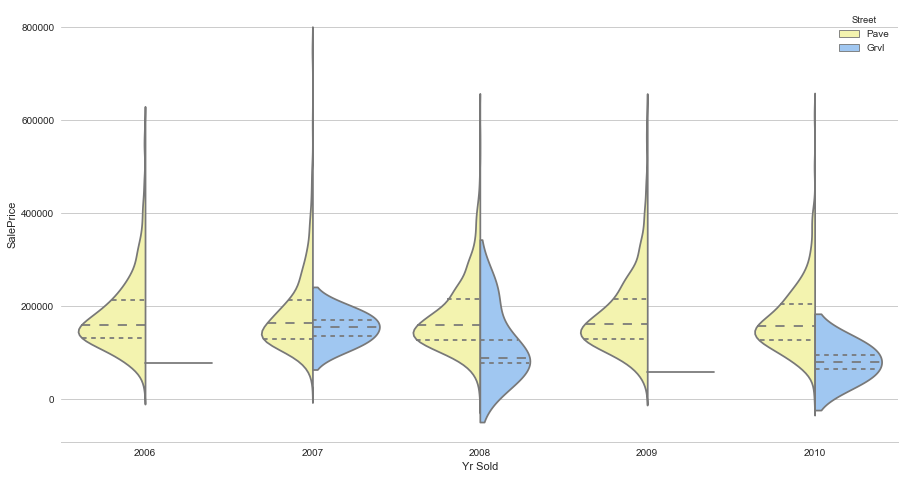

In [11]:
# Make some plots of the data to explore and practice using seaborn
# Arrange graphic
fig = plt.figure(figsize=(15,8)); sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="Yr Sold", y="SalePrice", hue="Street", data=df_Train, split=True,
               inner="quart", palette={"Grvl": "b", "Pave": "y"})
# Limit spines
sns.despine(left=True)

C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\matplotlib\cbook.py:2052: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\matplotlib\cbook.py:2053: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\matplotlib\cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\matplotlib\cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


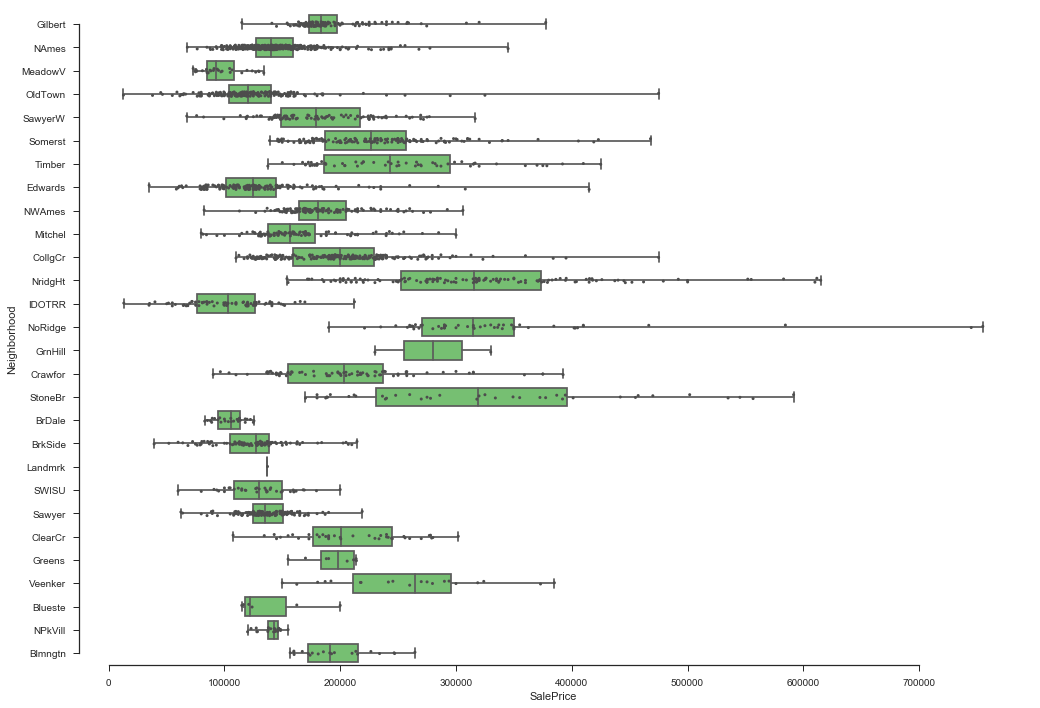

In [12]:
# Make some plots of the data to explore and practice using seaborn
# Why do I have all these RuntimeWarnings?
# Arrange graphic
fig = plt.figure(figsize=(17,12)); sns.set(style="ticks", palette="muted", color_codes=True)
# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="SalePrice", y="Neighborhood", data=df_Train, whis=np.inf, color="g")
# Add in points to show each observation
sns.stripplot(x="SalePrice", y="Neighborhood", data=df_Train, jitter=True, size=3, color=".3", linewidth=0)
# Limit spines
sns.despine(trim=True)

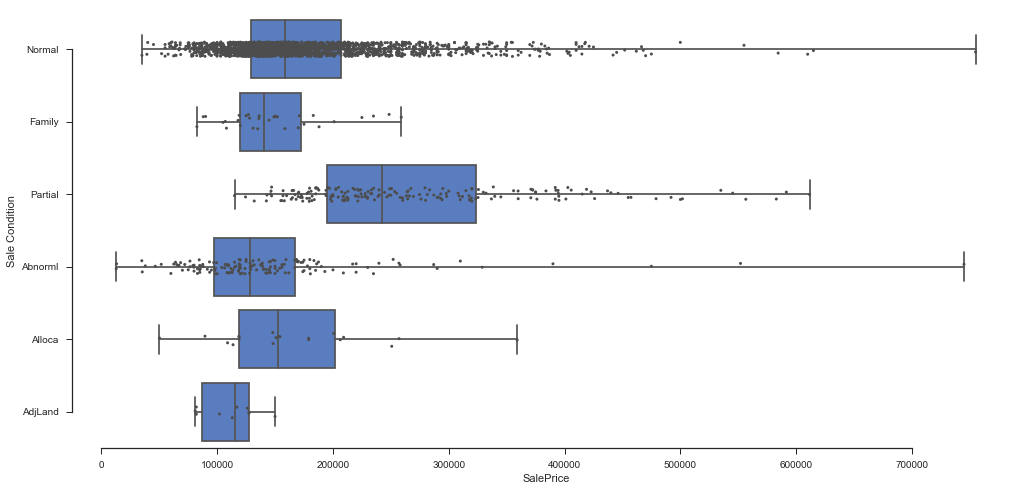

In [13]:
# Make some plots of the data to explore and practice using seaborn
# Why do I have all these RuntimeWarnings?
# Arrange graphic
fig = plt.figure(figsize=(17,8)); sns.set(style="ticks", palette="muted", color_codes=True)

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="SalePrice", y="Sale Condition", data=df_Train, whis=np.inf, color="b")

# Add in points to show each observation
sns.stripplot(x="SalePrice", y="Sale Condition", data=df_Train, jitter=True, size=3, color=".3", linewidth=0)
# Limit spines
sns.despine(trim=True)

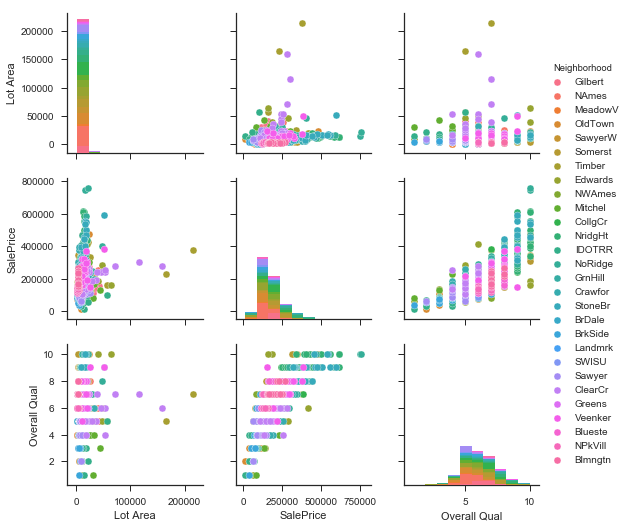

In [14]:
# look at some potentially important contributors to SalePrice (Lot Area, Overall Qual, Neightborhood) with pairplot
# Arrange graphic
fig = plt.figure(figsize=(30,30)) # This line seems to not works ? What's wrong ?
sns.pairplot(df_Train, hue="Neighborhood", vars=['Lot Area','SalePrice','Overall Qual']);

# Data Wrangling

- Mainly manage missing values, apply documentation standard, separate Categorical from Numerical

In [15]:
# Dataset wrangling
# data type spliting -> note we need to prepare both data set the same way. Manipulations will be done side by side as far as possible
df_Train_cat = df_Train.select_dtypes(include=object); df_Pred_cat = df_Pred.select_dtypes(include=object)
df_Train_num = df_Train.select_dtypes(exclude=object); df_Pred_num = df_Pred.select_dtypes(exclude=object)

In [16]:
# Data finer inspection of numerical with function Check_df
Check_df(df_Train_num)

C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


# missing values  # values < 0  # values = 0  \
2nd Flr SF                      0             0          1405   
3Ssn Porch                      0             0          2401   
Bedroom AbvGr                   0             0             8   
Bsmt Full Bath                  2             0          1412   
Bsmt Half Bath                  2             0          2285   
Bsmt Unf SF                     1             0           210   
BsmtFin SF 1                    1             0           773   
BsmtFin SF 2                    1             0          2135   
Enclosed Porch                  0             0          2055   
Fireplaces                      0             0          1186   
Full Bath                       0             0            11   
Garage Area                     1             0           136   
Garage Cars                     1             0           136   
Garage Yr Blt                 138             0             0   
Half Bath                       0             0          1554   
Kitchen AbvGr                   0             0             2   
Lot Frontage                  420             0             0   
Low Qual Fin SF                 0             0          2400   
Mas Vnr Area                   20             0          1438   
Misc Val                        0             0          2342   
Open Porch SF                   0             0          1080   
Pool Area                       0             0          2418   
Screen Porch                    0             0          2212   
Total Bsmt SF                   1             0            70   
Wood Deck SF                    0             0          1272   

                 # 0 < values < 1  
2nd Flr SF                      0  
3Ssn Porch                      0  
Bedroom AbvGr                   0  
Bsmt Full Bath                  0  
Bsmt Half Bath                  0  
Bsmt Unf SF                     0  
BsmtFin SF 1                    0  
BsmtFin SF 2                    0  
Enclosed Porch                  0  
Fireplaces                      0  
Full Bath                       0  
Garage Area                     0  
Garage Cars                     0  
Garage Yr Blt                   0  
Half Bath                       0  
Kitchen AbvGr                   0  
Lot Frontage                    0  
Low Qual Fin SF                 0  
Mas Vnr Area                    0  
Misc Val                        0  
Open Porch SF                   0  
Pool Area                       0  
Screen Porch                    0  
Total Bsmt SF                   0  
Wood Deck SF                    0

In [17]:
# Data finer inspection of numerical with function Check_df
Check_df(df_Pred_num)

C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


# missing values  # values < 0  # values = 0  \
2nd Flr SF                      0             0           273   
3Ssn Porch                      0             0           492   
Bsmt Full Bath                  0             0           295   
Bsmt Half Bath                  0             0           468   
Bsmt Unf SF                     0             0            34   
BsmtFin SF 1                    0             0           157   
BsmtFin SF 2                    0             0           443   
Enclosed Porch                  0             0           416   
Fireplaces                      0             0           236   
Full Bath                       0             0             1   
Garage Area                     0             0            21   
Garage Cars                     0             0            21   
Garage Yr Blt                  21             0             0   
Half Bath                       0             0           289   
Kitchen AbvGr                   0             0             1   
Lot Frontage                   70             0             0   
Low Qual Fin SF                 0             0           490   
Mas Vnr Area                    3             0           310   
Misc Val                        0             0           485   
Open Porch SF                   0             0           220   
Pool Area                       0             0           499   
Screen Porch                    0             0           462   
Total Bsmt SF                   0             0             9   
Wood Deck SF                    0             0           254   

                 # 0 < values < 1  
2nd Flr SF                      0  
3Ssn Porch                      0  
Bsmt Full Bath                  0  
Bsmt Half Bath                  0  
Bsmt Unf SF                     0  
BsmtFin SF 1                    0  
BsmtFin SF 2                    0  
Enclosed Porch                  0  
Fireplaces                      0  
Full Bath                       0  
Garage Area                     0  
Garage Cars                     0  
Garage Yr Blt                   0  
Half Bath                       0  
Kitchen AbvGr                   0  
Lot Frontage                    0  
Low Qual Fin SF                 0  
Mas Vnr Area                    0  
Misc Val                        0  
Open Porch SF                   0  
Pool Area                       0  
Screen Porch                    0  
Total Bsmt SF                   0  
Wood Deck SF                    0

- Applying function 'Check_df' allows me to identify missing values, negative values that make no sens in this dataset, and typo around 0 like '0.01' that is not a '0' value.
- In that dataset 0 values are a useful info according to the documentation

In [18]:
# Missing values for these columns must be replaced with 0 according to the documentation
df_Train['Lot Frontage'].fillna(value=0, inplace=True); df_Pred['Lot Frontage'].fillna(value=0, inplace=True)
df_Train['Mas Vnr Area'].fillna(value=0, inplace=True); df_Pred['Mas Vnr Area'].fillna(value=0, inplace=True)
# Here I decided to take the median value of the column as a median auto filter outliers if they exist in the data
df_Train['Garage Yr Blt'].fillna(df_Train['Garage Yr Blt'].median(), inplace=True); df_Pred['Garage Yr Blt'].fillna(df_Pred['Garage Yr Blt'].median(), inplace=True)

In [19]:
df_Train_cat.isnull().sum().sort_values(ascending=False)

Fireplace Qu      1186
Garage Cond        138
Garage Qual        138
Garage Finish      138
Garage Type        136
Bsmt Exposure       74
BsmtFin Type 2      72
Bsmt Qual           71
BsmtFin Type 1      71
Bsmt Cond           71
Mas Vnr Type        20
Electrical           1
Condition 1          0
Neighborhood         0
Condition 2          0
Bldg Type            0
Sale Condition       0
Lot Config           0
Land Slope           0
Roof Style           0
Utilities            0
Land Contour         0
Lot Shape            0
Street               0
House Style          0
Foundation           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Sale Type            0
Heating              0
Heating QC           0
Central Air          0
Kitchen Qual         0
Functional           0
Paved Drive          0
MS Zoning            0
dtype: int64

In [20]:
df_Pred_cat.isnull().sum().sort_values(ascending=False)

Fireplace Qu      236
Garage Cond        21
Garage Qual        21
Garage Finish      21
Garage Type        21
Bsmt Exposure       9
Bsmt Qual           9
Bsmt Cond           9
BsmtFin Type 2      9
BsmtFin Type 1      9
Mas Vnr Type        3
Sale Condition      0
House Style         0
Bldg Type           0
Condition 2         0
Condition 1         0
Land Slope          0
Neighborhood        0
Roof Matl           0
Lot Config          0
Utilities           0
Land Contour        0
Lot Shape           0
Street              0
Roof Style          0
Foundation          0
Exterior 1st        0
Exterior 2nd        0
Exter Qual          0
Exter Cond          0
Sale Type           0
Heating             0
Heating QC          0
Central Air         0
Electrical          0
Kitchen Qual        0
Functional          0
Paved Drive         0
MS Zoning           0
dtype: int64

In [21]:
# Aligning with the documentation
# Could you please give an example of code to avoid copy past several time the same filling ?

df_Train['Bsmt Qual'].fillna(value='NA', inplace=True); df_Pred['Bsmt Qual'].fillna(value='NA', inplace=True)
df_Train['Bsmt Cond'].fillna(value='NA', inplace=True); df_Pred['Bsmt Cond'].fillna(value='NA', inplace=True)
df_Train['Bsmt Exposure'].fillna(value='NA', inplace=True); df_Pred['Bsmt Exposure'].fillna(value='NA', inplace=True)
df_Train['BsmtFin Type 1'].fillna(value='NA', inplace=True); df_Pred['BsmtFin Type 1'].fillna(value='NA', inplace=True)
df_Train['BsmtFin Type 2'].fillna(value='NA', inplace=True); df_Pred['BsmtFin Type 2'].fillna(value='NA', inplace=True)
df_Train['Fireplace Qu'].fillna(value='NA', inplace=True); df_Pred['Fireplace Qu'].fillna(value='NA', inplace=True)
df_Train['Garage Type'].fillna(value='NA', inplace=True); df_Pred['Garage Type'].fillna(value='NA', inplace=True)
df_Train['Garage Finish'].fillna(value='NA', inplace=True); df_Pred['Garage Finish'].fillna(value='NA', inplace=True)
df_Train['Garage Qual'].fillna(value='NA', inplace=True); df_Pred['Garage Qual'].fillna(value='NA', inplace=True)
df_Train['Garage Cond'].fillna(value='NA', inplace=True); df_Pred['Garage Cond'].fillna(value='NA', inplace=True)
df_Train['Mas Vnr Type'].fillna(value='None', inplace=True); df_Pred['Mas Vnr Type'].fillna(value='None', inplace=True)

In [22]:
# Data finer inspection of categorical
# How to modify that line of code to show only the values that aren't 0 ?
df_Train_cat.isnull().sum().sort_values(ascending=False)

Fireplace Qu      1186
Garage Cond        138
Garage Qual        138
Garage Finish      138
Garage Type        136
Bsmt Exposure       74
BsmtFin Type 2      72
Bsmt Qual           71
BsmtFin Type 1      71
Bsmt Cond           71
Mas Vnr Type        20
Electrical           1
Condition 1          0
Neighborhood         0
Condition 2          0
Bldg Type            0
Sale Condition       0
Lot Config           0
Land Slope           0
Roof Style           0
Utilities            0
Land Contour         0
Lot Shape            0
Street               0
House Style          0
Foundation           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Sale Type            0
Heating              0
Heating QC           0
Central Air          0
Kitchen Qual         0
Functional           0
Paved Drive          0
MS Zoning            0
dtype: int64

In [23]:
# Data finer inspection of categorical
df_Pred_cat.isnull().sum().sort_values(ascending=False)

Fireplace Qu      236
Garage Cond        21
Garage Qual        21
Garage Finish      21
Garage Type        21
Bsmt Exposure       9
Bsmt Qual           9
Bsmt Cond           9
BsmtFin Type 2      9
BsmtFin Type 1      9
Mas Vnr Type        3
Sale Condition      0
House Style         0
Bldg Type           0
Condition 2         0
Condition 1         0
Land Slope          0
Neighborhood        0
Roof Matl           0
Lot Config          0
Utilities           0
Land Contour        0
Lot Shape           0
Street              0
Roof Style          0
Foundation          0
Exterior 1st        0
Exterior 2nd        0
Exter Qual          0
Exter Cond          0
Sale Type           0
Heating             0
Heating QC          0
Central Air         0
Electrical          0
Kitchen Qual        0
Functional          0
Paved Drive         0
MS Zoning           0
dtype: int64

In [42]:
# Final check of Df
Check_df(df_Train)

C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


# missing values  # values < 0  # values = 0  \
2nd Flr SF                      0             0          1405   
3Ssn Porch                      0             0          2401   
Bedroom AbvGr                   0             0             8   
Bsmt Full Bath                  2             0          1412   
Bsmt Half Bath                  2             0          2285   
Bsmt Unf SF                     1             0           210   
BsmtFin SF 1                    1             0           773   
BsmtFin SF 2                    1             0          2135   
Enclosed Porch                  0             0          2055   
Fireplaces                      0             0          1186   
Full Bath                       0             0            11   
Garage Area                     1             0           136   
Garage Cars                     1             0           136   
Half Bath                       0             0          1554   
Kitchen AbvGr                   0             0             2   
Lot Frontage                    0             0           420   
Low Qual Fin SF                 0             0          2400   
Mas Vnr Area                    0             0          1458   
Misc Val                        0             0          2342   
Open Porch SF                   0             0          1080   
Pool Area                       0             0          2418   
Screen Porch                    0             0          2212   
Total Bsmt SF                   1             0            70   
Wood Deck SF                    0             0          1272   

                 # 0 < values < 1  
2nd Flr SF                      0  
3Ssn Porch                      0  
Bedroom AbvGr                   0  
Bsmt Full Bath                  0  
Bsmt Half Bath                  0  
Bsmt Unf SF                     0  
BsmtFin SF 1                    0  
BsmtFin SF 2                    0  
Enclosed Porch                  0  
Fireplaces                      0  
Full Bath                       0  
Garage Area                     0  
Garage Cars                     0  
Half Bath                       0  
Kitchen AbvGr                   0  
Lot Frontage                    0  
Low Qual Fin SF                 0  
Mas Vnr Area                    0  
Misc Val                        0  
Open Porch SF                   0  
Pool Area                       0  
Screen Porch                    0  
Total Bsmt SF                   0  
Wood Deck SF                    0

In [ ]:
# Some missing values need to be droped
# Drop the remaining few missing values from our dataset
df_Train.dropna(inplace=True)

In [43]:
# Final check of Df
Check_df(df_Pred)

C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


# missing values  # values < 0  # values = 0  \
2nd Flr SF                      0             0           273   
3Ssn Porch                      0             0           492   
Bsmt Full Bath                  0             0           295   
Bsmt Half Bath                  0             0           468   
Bsmt Unf SF                     0             0            34   
BsmtFin SF 1                    0             0           157   
BsmtFin SF 2                    0             0           443   
Enclosed Porch                  0             0           416   
Fireplaces                      0             0           236   
Full Bath                       0             0             1   
Garage Area                     0             0            21   
Garage Cars                     0             0            21   
Half Bath                       0             0           289   
Kitchen AbvGr                   0             0             1   
Lot Frontage                    0             0            70   
Low Qual Fin SF                 0             0           490   
Mas Vnr Area                    0             0           313   
Misc Val                        0             0           485   
Open Porch SF                   0             0           220   
Pool Area                       0             0           499   
Screen Porch                    0             0           462   
Total Bsmt SF                   0             0             9   
Wood Deck SF                    0             0           254   

                 # 0 < values < 1  
2nd Flr SF                      0  
3Ssn Porch                      0  
Bsmt Full Bath                  0  
Bsmt Half Bath                  0  
Bsmt Unf SF                     0  
BsmtFin SF 1                    0  
BsmtFin SF 2                    0  
Enclosed Porch                  0  
Fireplaces                      0  
Full Bath                       0  
Garage Area                     0  
Garage Cars                     0  
Half Bath                       0  
Kitchen AbvGr                   0  
Lot Frontage                    0  
Low Qual Fin SF                 0  
Mas Vnr Area                    0  
Misc Val                        0  
Open Porch SF                   0  
Pool Area                       0  
Screen Porch                    0  
Total Bsmt SF                   0  
Wood Deck SF                    0

# Data Feature Engineering

In [44]:
# Based on my feeling and expertise when looking a flat or house I will create some new features
# What about TPOT or Auto-Sklearn libraries ???
# I was on the point to buid a loop to create new feature, assess their correlation with y, keep or drop according to correl score.
# When I learnt about TPOT & Auto-Sklearn. Any good TPOT Regression example? :)

# Not easy to build new features without creating collinearity all these 4 are linear combinations :(
df_Train['Tot_area'] = df_Train['Total Bsmt SF'] + df_Train['Gr Liv Area'] # Correl score 0.78
df_Train['Tot_full_bath'] = df_Train['Full Bath'] + df_Train['Bsmt Full Bath'] # Correl score 0.61
df_Train['Tot_room'] = (df_Train['Bedroom AbvGr'] + df_Train['Bsmt Full Bath'] + df_Train['Bsmt Half Bath']
+ df_Train['Full Bath'] + df_Train['Half Bath']) # Correl score 0.54
df_Train['Ratio_Bedroom_full_bath'] = df_Train['Bedroom AbvGr']/df_Train['Tot_full_bath']

df_Pred['Tot_area'] = df_Pred['Total Bsmt SF'] + df_Pred['Gr Liv Area']
df_Pred['Tot_full_bath'] = df_Pred['Full Bath'] + df_Pred['Bsmt Full Bath']
df_Pred['Tot_room'] = (df_Pred['Bedroom AbvGr'] + df_Pred['Bsmt Full Bath'] + df_Pred['Bsmt Half Bath']
+ df_Pred['Full Bath'] + df_Pred['Half Bath'])
df_Pred['Ratio_Bedroom_full_bath'] = df_Pred['Bedroom AbvGr']/df_Pred['Tot_full_bath']

# As a come back step after reaching the Data Modelling stage, drop initial variables to avoid to increase collinearity in predictors.
# Select the one to drop regarding the correlation matrix
df_Train.drop(columns=['Total Bsmt SF', 'Bsmt Full Bath'], inplace=True); df_Pred.drop(columns=['Total Bsmt SF', 'Bsmt Full Bath'], inplace=True)

In [45]:
# Add a LogSalePrice variable to the DataFrame to correct the skewness of SalePrice
df_Train['LogSalePrice'] = np.log10(df_Train['SalePrice'])
# One drop SalePrice
df_Train.drop(columns=['SalePrice'], inplace=True)

In [46]:
# Update dfs after Feature Engineering
df_Train_num = df_Train.select_dtypes(exclude=object); df_Pred_num = df_Pred.select_dtypes(exclude=object)

## Data Transformation

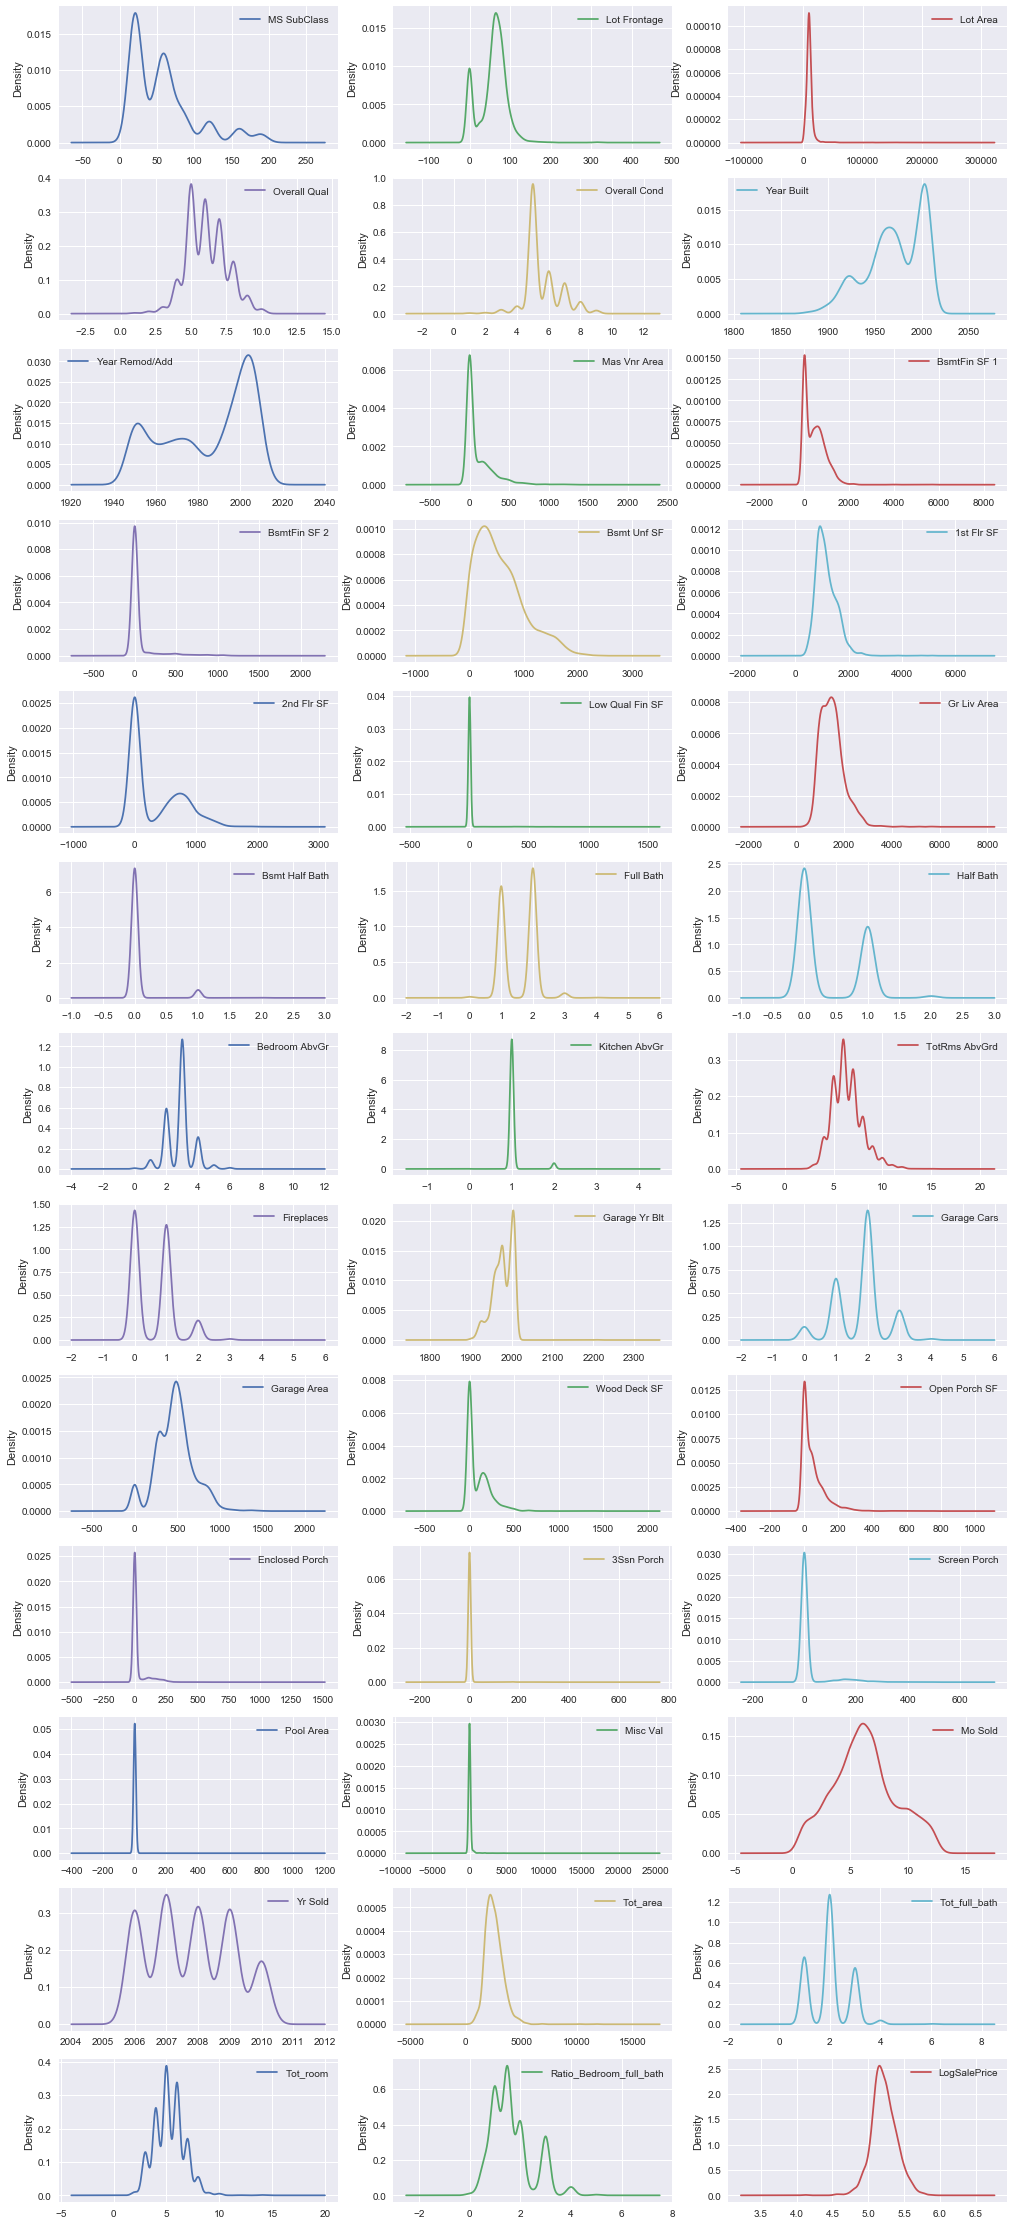

In [47]:
# Representation of the distribution of data using density plot for a first visual check
df_Train.plot(kind='density', subplots=True, layout=(24,3), figsize=(17,75), sharex=False);

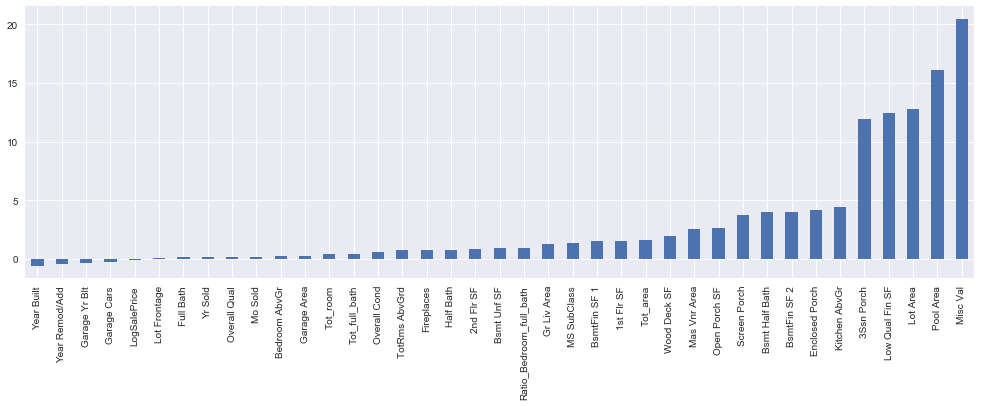

In [48]:
# Visual overview of the skewness in each row of df_Train and skip the na values  
df_Train_num.skew(axis = 0, skipna = True).sort_values().plot.bar(figsize=(17,5));

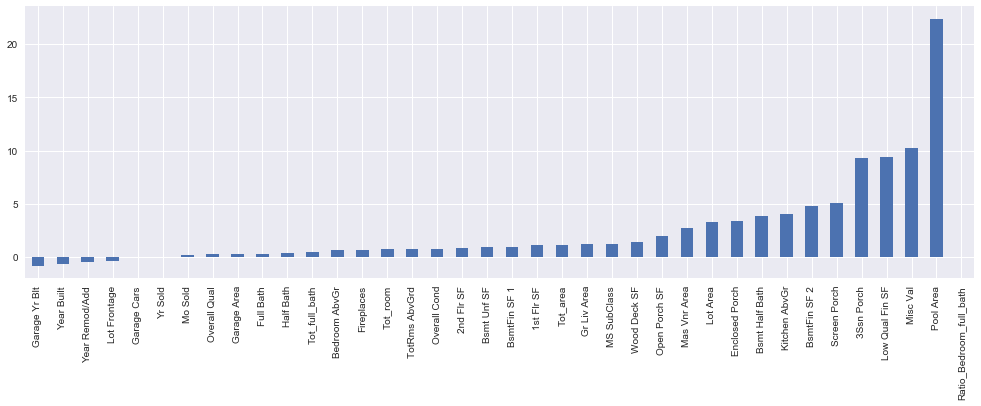

In [49]:
# Visual overview of the skewness in each row of df_Pred and skip the na values
# Something wrong in Ratio_Bedroom_full_bath -> Outliers removal section
df_Pred_num.skew(axis = 0, skipna = True).sort_values().plot.bar(figsize=(17,5));

In [50]:
# Selection of the skewed columns based on the threshold of the SalePrice column
# What is the robust way to define the skewing threshold? 
col_skew = df_Train_num.columns[abs(df_Train_num.skew()) >= 1.790280]; col_skew

Index(['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 2', 'Low Qual Fin SF',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
       'Misc Val'],
      dtype='object')

In [51]:
# Overview of the skewed columns in the df_pred
# By curisosity to check if the hypothesis that the Train set is representative of the Pred set. But variable choice is made based on the Train set.
col_skew_Pred = df_Pred_num.columns[abs(df_Pred_num.skew()) >= 1.790280]; col_skew_Pred

Index(['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 2', 'Low Qual Fin SF',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val'],
      dtype='object')

In [52]:
col_skew[:-1]

Index(['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 2', 'Low Qual Fin SF',
       'Bsmt Half Bath', 'Kitchen AbvGr', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area'],
      dtype='object')

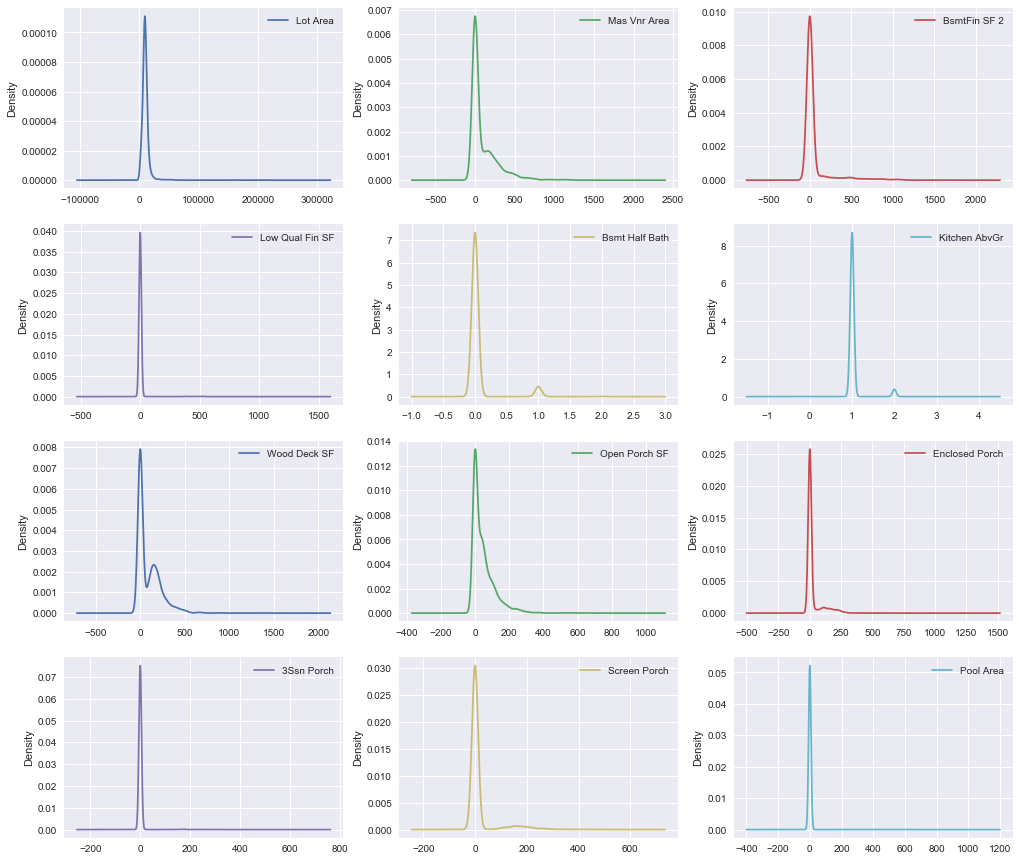

In [53]:
# Representation of the distribution of data using density plot
df_Train[col_skew[:-1]].plot(kind='density', subplots=True, layout=(19,3), figsize=(17,75), sharex=False);

In [54]:
# Transforms the skewed columns based on the threshold of the SalePrice column
# I have got a RuntimeWarning, is it because of the log function and the zero in the data set ?
df_Train[col_skew[:-1]] = np.log1p(df_Train[col_skew[:-1]]); df_Pred[col_skew[:-1]] = np.log1p(df_Pred[col_skew[:-1]])

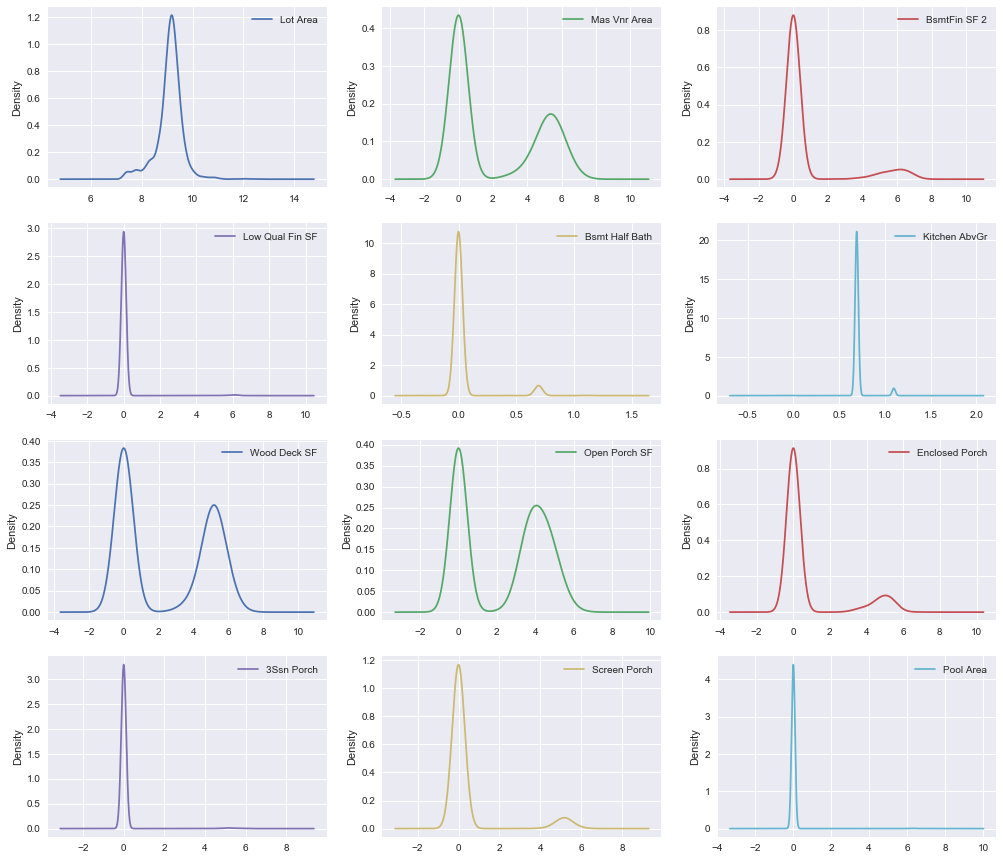

In [55]:
# Representation of the distribution of data using density plot after transformation
# Anyway to plot the density plots having all graphs side by side before/after?
df_Train[col_skew[:-1]].plot(kind='density', subplots=True, layout=(19,3), figsize=(17,75), sharex=False);

# Data Encoding

- Dealing with data types, there are three main data types:

    - Numeric, e.g. Misc Val, Pool Area	
    - Categorical, e.g. Lot Shape, Utilities
    - Ordinal, e.g. x	Excellent, Good, Average
    
    
- Models can only handle numeric features one must convert categorical and ordinal features into numeric features


- Create dummy features

    - Transform a categorical non-ordinal feature into a set of dummy features, each representing a unique category
    - In the set of dummy features, 1 indicates that the observation belongs to that category

In [56]:
# Overview of categorical columns
df_Train_cat.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
1        RL   Pave       Reg          Lvl    AllPub     Corner        Gtl   
2        RM   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
4        RM   Pave       IR1          Bnk    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0      Gilbert        Norm        Norm      1Fam      2Story      Gable   
1        NAmes        Norm        Norm      1Fam      1Story        Hip   
2      MeadowV        Norm        Norm     Twnhs      2Story      Gable   
3        NAmes        Norm        Norm      1Fam      1Story        Hip   
4      OldTown       Feedr        Norm    2fmCon      2.5Unf        Hip   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      VinylSd      VinylSd         None         Gd         TA   
1   CompShg      Wd Sdng      Wd Sdng      BrkFace         TA         TA   
2   CompShg      CemntBd      CmentBd      BrkFace         TA         TA   
3   CompShg      BrkFace      BrkFace         None         TA         TA   
4   CompShg      Wd Sdng      Wd Sdng         None         Fa         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0      PConc        Gd        TA            No            GLQ            Unf   
1     CBlock        TA        TA            No            Unf            Unf   
2     CBlock        TA        TA            No            Unf            Unf   
3     CBlock        TA        TA            No            Rec            Unf   
4     CBlock        TA        TA            No            Unf            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Ex           Y      SBrkr           Gd        Typ   
1    GasA         TA           Y      SBrkr           Gd        Typ   
2    GasA         Fa           Y      SBrkr           TA        Typ   
3    GasA         Gd           Y      SBrkr           Gd        Typ   
4    GasA         TA           N      FuseF           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0           TA     BuiltIn           Fin          TA          TA           Y   
1           Gd      Attchd           Unf          TA          TA           Y   
2          NaN      Attchd           Unf          TA          TA           Y   
3           Gd      Attchd           RFn          TA          TA           Y   
4           Gd      Detchd           Unf          TA          TA           N   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       WD          Normal  
3       WD          Normal  
4       WD          Normal

In [57]:
# Overview of categorical columns
df_Pred_cat.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          HLS    AllPub     Corner        Mod   
1        RL   Pave       Reg          Low    AllPub     Inside        Mod   
2        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
4   C (all)   Pave       Reg          HLS    AllPub     Inside        Mod   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0      Crawfor        Norm        Norm      1Fam      1.5Fin      Gable   
1      CollgCr        Norm        Norm      1Fam      1Story      Gable   
2      NridgHt        Norm        Norm      1Fam      2Story      Gable   
3        NAmes        Norm        Norm      1Fam      1Story      Gable   
4       IDOTRR        Norm        Norm      1Fam      1.5Fin      Gable   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      MetalSd      MetalSd      BrkFace         TA         TA   
1   CompShg      VinylSd      VinylSd         None         TA         Gd   
2   CompShg      VinylSd      VinylSd        Stone         Gd         TA   
3   CompShg      Wd Sdng      Wd Sdng      BrkFace         TA         TA   
4   CompShg      MetalSd      MetalSd         None         TA         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0     CBlock        TA        TA            Mn            Rec            LwQ   
1      PConc        TA        TA            No            ALQ            Unf   
2      PConc        Gd        TA            Mn            Unf            Unf   
3     CBlock        TA        TA            No            Rec            Unf   
4      Stone        TA        TA            Mn            Unf            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         TA           Y      SBrkr           TA        Typ   
1    GasA         Ex           Y      SBrkr           TA        Typ   
2    GasA         Ex           Y      SBrkr           Ex        Typ   
3    GasA         Ex           Y      SBrkr           TA        Typ   
4    GasA         Gd           Y      SBrkr           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0           Gd      Detchd           Unf          TA          Fa           Y   
1          NaN      Attchd           RFn          TA          TA           Y   
2           Gd     BuiltIn           Fin          TA          TA           Y   
3          NaN      Attchd           RFn          TA          TA           Y   
4          NaN      Detchd           RFn          TA          TA           N   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       New        Partial  
3       WD          Family  
4       WD         Abnorml

### Ordinal variable encoding manually

In [58]:
# Ordinal variables convertion according to documentation
# Would OrdinalEncoder be the solution ? Shall we gather all dictionary in one to cover the entire encoding operation in one line ?

df_Train['Lot Shape'] = df_Train['Lot Shape'].map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':3})
df_Train['Utilities'] = df_Train['Utilities'].map({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
df_Train['Land Slope'] = df_Train['Land Slope'].map({'Gtl':1, 'Mod':2, 'Sev':3})
df_Train['Exter Qual'] = df_Train['Exter Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_Train['Exter Cond'] = df_Train['Exter Cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_Train['Bsmt Qual'] = df_Train['Bsmt Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Train['Bsmt Cond'] = df_Train['Bsmt Cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Train['Bsmt Exposure'] = df_Train['Bsmt Exposure'].map({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5})
df_Train['BsmtFin Type 1'] = df_Train['BsmtFin Type 1'].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5, 'Unf': 6, 'NA':7})
df_Train['BsmtFin Type 2'] = df_Train['BsmtFin Type 2'].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5, 'Unf': 6, 'NA':7})
df_Train['Heating QC'] = df_Train['Heating QC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_Train['Electrical'] = df_Train['Electrical'].map({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix': 5})
df_Train['Kitchen Qual'] = df_Train['Kitchen Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_Train['Functional'] = df_Train['Functional'].map({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8})
df_Train['Fireplace Qu'] = df_Train['Fireplace Qu'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Train['Garage Finish'] = df_Train['Garage Finish'].map({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
df_Train['Garage Qual'] = df_Train['Garage Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Train['Garage Cond'] = df_Train['Garage Cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Train['Paved Drive'] = df_Train['Paved Drive'].map({'Y':1, 'P':2, 'N':3})

df_Pred['Lot Shape'] = df_Pred['Lot Shape'].map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':3})
df_Pred['Utilities'] = df_Pred['Utilities'].map({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
df_Pred['Land Slope'] = df_Pred['Land Slope'].map({'Gtl':1, 'Mod':2, 'Sev':3})
df_Pred['Exter Qual'] = df_Pred['Exter Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_Pred['Exter Cond'] = df_Pred['Exter Cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_Pred['Bsmt Qual'] = df_Pred['Bsmt Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Pred['Bsmt Cond'] = df_Pred['Bsmt Cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Pred['Bsmt Exposure'] = df_Pred['Bsmt Exposure'].map({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5})
df_Pred['BsmtFin Type 1'] = df_Pred['BsmtFin Type 1'].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5, 'Unf': 6, 'NA':7})
df_Pred['BsmtFin Type 2'] = df_Pred['BsmtFin Type 2'].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5, 'Unf': 6, 'NA':7})
df_Pred['Heating QC'] = df_Pred['Heating QC'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_Pred['Electrical'] = df_Pred['Electrical'].map({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix': 5})
df_Pred['Kitchen Qual'] = df_Pred['Kitchen Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df_Pred['Functional'] = df_Pred['Functional'].map({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8})
df_Pred['Fireplace Qu'] = df_Pred['Fireplace Qu'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Pred['Garage Finish'] = df_Pred['Garage Finish'].map({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
df_Pred['Garage Qual'] = df_Pred['Garage Qual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Pred['Garage Cond'] = df_Pred['Garage Cond'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA': 6})
df_Pred['Paved Drive'] = df_Pred['Paved Drive'].map({'Y':1, 'P':2, 'N':3})

### Optimization of categorization before One Hot Encoding

- I choosed to use OHE as it is more powerful than numerical encoding.
- However it is good to look at how to optimize by grouping categories with a few items only.

In [59]:
# Overview of the number of category per feature in a way to dig deeper to prepare data before One Hot Encoding
# From how many categories shall we consider Target/Mean encoding technics ?
for col_name in df_Train.columns:
    if df_Train[col_name].dtypes == 'object':
        unique_cat = len(df_Train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'MS Zoning' has 7 unique categories
Feature 'Street' has 2 unique categories
Feature 'Land Contour' has 4 unique categories
Feature 'Lot Config' has 5 unique categories
Feature 'Neighborhood' has 28 unique categories
Feature 'Condition 1' has 9 unique categories
Feature 'Condition 2' has 8 unique categories
Feature 'Bldg Type' has 5 unique categories
Feature 'House Style' has 8 unique categories
Feature 'Roof Style' has 6 unique categories
Feature 'Roof Matl' has 7 unique categories
Feature 'Exterior 1st' has 6 unique categories
Feature 'Exterior 2nd' has 6 unique categories
Feature 'Mas Vnr Type' has 5 unique categories
Feature 'Foundation' has 6 unique categories
Feature 'Heating' has 6 unique categories
Feature 'Central Air' has 2 unique categories
Feature 'Garage Type' has 7 unique categories
Feature 'Sale Type' has 4 unique categories
Feature 'Sale Condition' has 6 unique categories


In [60]:
# Deal with ordinal variables that need coding
# View levels
# for col_name in df_Train.columns:
    #print("Levels for Feature '{0}': {1}".format(col_name, df_Train[col_name].unique()))

In [61]:
# Check if features with a lot of categories can be grouped under less category
# here it is not the case, one let it like it is
print(df_Train['Neighborhood'].value_counts().sort_values(ascending=False).head(10))

NAmes      361
CollgCr    226
OldTown    209
Edwards    159
Somerst    151
Gilbert    135
NridgHt    134
Sawyer     128
NWAmes     121
SawyerW    102
Name: Neighborhood, dtype: int64


In [62]:
# Check if features with a lot of categories can be grouped under less category
print(df_Train['Exterior 1st'].value_counts().sort_values(ascending=False).head(10))

VinylSd    858
MetalSd    371
HdBoard    368
Wd Sdng    342
Other      299
Plywood    192
Name: Exterior 1st, dtype: int64


In [63]:
# In this case, bucket low frequecy categories as "Other"
# What is the Pythonistic way of coding it ?
df_Train['Exterior 1st'] = ['VinylSd' if x == 'VinylSd' else 'MetalSd' if x == 'MetalSd' else 'HdBoard' if x == 'HdBoard' else 'Wd Sdng' if x == 'Wd Sdng' else 'Plywood' if x == 'Plywood' else 'Other' for x in df_Train['Exterior 1st']]
df_Pred['Exterior 1st'] = ['VinylSd' if x == 'VinylSd' else 'MetalSd' if x == 'MetalSd' else 'HdBoard' if x == 'HdBoard' else 'Wd Sdng' if x == 'Wd Sdng' else 'Plywood' if x == 'Plywood' else 'Other' for x in df_Pred['Exterior 1st']]
print(df_Train['Exterior 1st'].value_counts().sort_values(ascending=False)); print(df_Pred['Exterior 1st'].value_counts().sort_values(ascending=False))

VinylSd    858
MetalSd    371
HdBoard    368
Wd Sdng    342
Other      299
Plywood    192
Name: Exterior 1st, dtype: int64
VinylSd    168
MetalSd     79
Wd Sdng     78
HdBoard     74
Other       72
Plywood     29
Name: Exterior 1st, dtype: int64


In [64]:
# Check if features with a lot of categories can be grouped under less category
print(df_Train['Exterior 2nd'].value_counts().sort_values(ascending=False).head(10))

VinylSd    850
MetalSd    366
HdBoard    342
Wd Sdng    327
Other      317
Plywood    228
Name: Exterior 2nd, dtype: int64


In [65]:
# In this case, bucket low frequecy categories as "Other"
# What is the Pythonistic way of coding it ?
df_Train['Exterior 2nd'] = ['VinylSd' if x == 'VinylSd' else 'MetalSd' if x == 'MetalSd' else 'HdBoard' if x == 'HdBoard' else 'Wd Sdng' if x == 'Wd Sdng' else 'Plywood' if x == 'Plywood' else 'Other' for x in df_Train['Exterior 2nd']]
df_Pred['Exterior 2nd'] = ['VinylSd' if x == 'VinylSd' else 'MetalSd' if x == 'MetalSd' else 'HdBoard' if x == 'HdBoard' else 'Wd Sdng' if x == 'Wd Sdng' else 'Plywood' if x == 'Plywood' else 'Other' for x in df_Pred['Exterior 2nd']]
print(df_Train['Exterior 2nd'].value_counts().sort_values(ascending=False)); print(df_Pred['Exterior 2nd'].value_counts().sort_values(ascending=False))

VinylSd    850
MetalSd    366
HdBoard    342
Wd Sdng    327
Other      317
Plywood    228
Name: Exterior 2nd, dtype: int64
VinylSd    165
MetalSd     81
Other       74
Wd Sdng     70
HdBoard     64
Plywood     46
Name: Exterior 2nd, dtype: int64


In [66]:
# I need to find the exact way the categorical 'WD' is written in 'Sale Type' there is space before or after
list=[]
list=df_Train['Sale Type']
list

PID
528275070    WD 
535305120    WD 
923228250    WD 
535152150    WD 
903475060    WD 
            ... 
904301070    WD 
907126010    WD 
527353080    WD 
535402070    WD 
905402110    WD 
Name: Sale Type, Length: 2430, dtype: object

In [67]:
# the categorical WD in 'Sale Type' is written with a space after
df_Train.loc[0,'Sale Type']

KeyError: 0

In [68]:
# Check if features with a lot of categories can be grouped under less category
# here it is not the case
print(df_Train['Sale Type'].value_counts().sort_values(ascending=False).head(10))

WD       2116
New       186
COD        74
Other      54
Name: Sale Type, dtype: int64


In [69]:
# Df remove PID from feature
df_Train.set_index('PID', inplace=True)
df_Pred.set_index('PID', inplace=True)

KeyError: "None of ['PID'] are in the columns"

In [70]:
# Update dfs after Feature Engineering
df_Train_num = df_Train.select_dtypes(exclude=object); df_Pred_num = df_Pred.select_dtypes(exclude=object)

In [71]:
# In this case, bucket low frequecy categories as "Other"
# What is the Pythonistic way of coding it ?
df_Train['Sale Type'] = ['WD ' if x == 'WD 'else 'New' if x == 'New' else 'COD' if x == 'COD' else 'Other' for x in df_Train['Sale Type']];
df_Pred['Sale Type'] = ['WD ' if x == 'WD 'else 'New' if x == 'New' else 'COD' if x == 'COD' else 'Other' for x in  df_Pred['Sale Type']]
print(df_Train['Sale Type'].value_counts().sort_values(ascending=False));
print(df_Pred['Sale Type'].value_counts().sort_values(ascending=False))

WD       2116
New       186
COD        74
Other      54
Name: Sale Type, dtype: int64
WD       420
New       53
Other     14
COD       13
Name: Sale Type, dtype: int64


### Performs One Hot Encoding

In [72]:
# Transform a categorical non-ordinal feature into a set of dummy features, each representing a unique category
# I do not use Drop_first=True because I will use regularization algorithm
df_Train_encoded = pd.get_dummies(df_Train); df_Pred_encoded = pd.get_dummies(df_Pred)
print('Size of Df_Train_encoded:', df_Train_encoded.shape, '\nSize Df_Pred_encoded:', df_Pred_encoded.shape)

Size of Df_Train_encoded: (2430, 195) 
Size Df_Pred_encoded: (500, 177)


In [73]:
# Extract columns names for Dfs columns comparaisons
df_Train_encoded_features = set(df_Train_encoded.columns)
df_Pred_encoded_features = set(df_Pred_encoded.columns)

# Additionnal features in the Df_Pred_encoded
print('Additionnal features in the Df_Pred_encoded are:\n', df_Pred_encoded_features - df_Train_encoded_features)
# Additionnal features from the Df_Train_encoded
print('\nAdditionnal features from the Df_Train_encoded are:\n', df_Train_encoded_features - df_Pred_encoded_features)

Additionnal features in the Df_Pred_encoded are:
 {'Roof Matl_Roll'}

Additionnal features from the Df_Train_encoded are:
 {'Foundation_Wood', 'Condition 2_Artery', 'Condition 2_RRAn', 'LogSalePrice', 'Heating_Floor', 'Condition 2_PosA', 'Roof Matl_Membran', 'MS Zoning_I (all)', 'Neighborhood_Greens', 'MS Zoning_A (agr)', 'Roof Style_Shed', 'Neighborhood_GrnHill', 'Roof Matl_WdShngl', 'Roof Matl_ClyTile', 'Neighborhood_Landmrk', 'Condition 2_RRAe', 'Roof Matl_Metal', 'Condition 2_RRNn', 'Mas Vnr Type_CBlock'}


- Df_pred_encoded has one feature 'Roof Matl_Roll' than Df_Train_encoded hasn't. And Df_Train-Encoded has 19 featrues that DF-Pred_encoded hasn't.
- One need to keep only common features betewwn Df_Pred_encoded & Df_Train_encoded, however Df_Train_encoded has 'SalePrice' column we need to keep. One will put it in the index temporary.

In [74]:
# Temporary store 'LogSalePrice' in index
df_Train_encoded.set_index('LogSalePrice', inplace=True)
# Clean 'Roof Matl_Roll' from the df_Pred_encoded
df_Pred_encoded.drop(columns=['Roof Matl_Roll'], inplace=True)
# Trim additionnal features based on Df_Pred_encoded
df_Train_encoded_reindexed = df_Train_encoded.reindex(columns=df_Pred_encoded.columns, fill_value=0)
# Return 'LogSalePrice' from index to columns
df_Train_encoded_reindexed.reset_index(inplace=True)
print('Size Df_Train_encoded_reindexed:', df_Train_encoded_reindexed.shape, '\nSize Df_Pred_encoded:', df_Pred_encoded.shape)

Size Df_Train_encoded_reindexed: (2430, 177) 
Size Df_Pred_encoded: (500, 176)


In [75]:
# Rename the dfs to keep shorter names
df_Train=df_Train_encoded_reindexed; df_Pred=df_Pred_encoded
print('Size df_Train:', df_Train.shape, '\nSize df_Pred:', df_Pred.shape)

Size df_Train: (2430, 177) 
Size df_Pred: (500, 176)


# ---------------------------------------------------------------------------------------------------------------

# --------------------------------- DATA PREPROCESSING end -----------------------------------

# ---------------------------------------------------------------------------------------------------------------

# Data Outliers management

In [76]:
# Remove outliers
# With such a number of variable and their distribution face to the response variable I do not feel comfortable
# using Z-Score filter. However I am curious to know what would have been the best way to remove outliers with such data.
# Remove outliers manually (Do It Yourself style :) )
df_Train=df_Train[(df_Train['Lot Area'] < 11.5)
                  & (df_Train['Lot Frontage'] < 250)
                  & (df_Train['Utilities'] < 2)
                  & (df_Train['Lot Frontage'] < 250)
                  & (df_Train['Bedroom AbvGr'] < 7)
                  & (df_Train['Fireplaces'] <= 3)
                  & (df_Train['Garage Yr Blt'] < 2020)
                  & (df_Train['Garage Area'] < 1300)
                  & (df_Train['Wood Deck SF'] < 7)                  
                  & (df_Train['Misc Val'] < 100000)
                  & (df_Train['Tot_room'] > 1)
                  &(df_Train['LogSalePrice'] > 4.75)
                  & (df_Train['LogSalePrice'] < 5.75)
                  & (df_Train['Ratio_Bedroom_full_bath'] < 10)
                 ]

df_Pred=df_Pred[(df_Pred['Lot Area'] < 11.5)
                  & (df_Pred['Lot Frontage'] < 250)
                  & (df_Pred['Utilities'] < 2)
                  & (df_Pred['Lot Frontage'] < 250)
                  & (df_Pred['Bedroom AbvGr'] < 7)
                  & (df_Pred['Fireplaces'] <= 3)
                  & (df_Pred['Garage Yr Blt'] < 2020)
                  & (df_Pred['Garage Area'] < 1300)
                  & (df_Pred['Wood Deck SF'] < 7)                  
                  & (df_Pred['Misc Val'] < 100000)
                  & (df_Pred['Tot_room'] > 1)
                  & (df_Pred['Ratio_Bedroom_full_bath'] < 10)
                 ]
                     
print('Size df_Train:', df_Train.shape, '\nSize df_Pred:', df_Pred.shape)

Size df_Train: (2385, 177) 
Size df_Pred: (499, 176)


In [86]:
df_Train.info(177)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2385 entries, 0 to 2429
Data columns (total 177 columns):
LogSalePrice               float64
MS SubClass                int64
Lot Frontage               float64
Lot Area                   float64
Lot Shape                  int64
Utilities                  int64
Land Slope                 int64
Overall Qual               int64
Overall Cond               int64
Year Built                 int64
Year Remod/Add             int64
Mas Vnr Area               float64
Exter Qual                 int64
Exter Cond                 int64
Bsmt Qual                  int64
Bsmt Cond                  int64
Bsmt Exposure              int64
BsmtFin Type 1             int64
BsmtFin SF 1               float64
BsmtFin Type 2             int64
BsmtFin SF 2               float64
Bsmt Unf SF                float64
Heating QC                 int64
Electrical                 float64
1st Flr SF                 int64
2nd Flr SF                 int64
Low Qual Fin SF   

C:\Users\Joker\Anaconda3\envs\exts-aml2\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


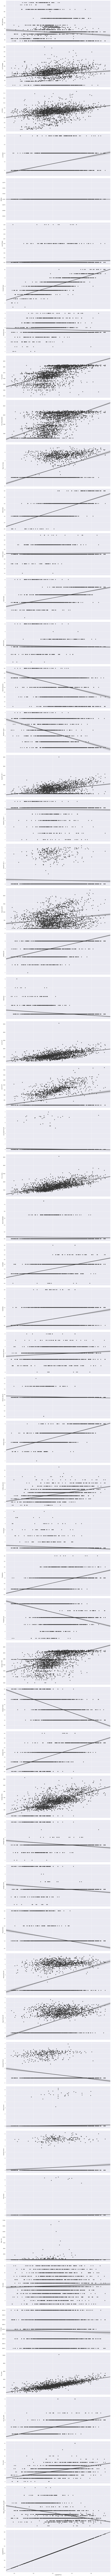

In [77]:
# Data visualization
sns.set()
g=sns.PairGrid(df_Train, size=6, aspect=2.5, x_vars=['LogSalePrice'], y_vars= df_Train_num.columns)
g.map(sns.regplot, color=".2");

# ---------------------------------------------------------------------------------------------------------------

# ------------------------------------- DATA MODELLING start --------------------------------------

# ---------------------------------------------------------------------------------------------------------------

# Data Modelling

- Before starting to choose any model an overview of the collinearity between the predictors is a good idea

In [78]:
# Helper function to seek the k best correlations with the dependant variable
def CorrMat(df,y,k):
# df as 'DataFrame' = DataFrame
# k as 'int'= number of variables with highest correlation for heatmap,
# y as 'str'= dependant variable
    corrmat = df.corr(method='pearson')
    # With np.abs we take in acount negative correlation
    cols = np.abs(corrmat).nlargest(k,y)[y].index
    cm = np.corrcoef(df[cols].values.T)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(cm, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set label ticks size
    sns.set(font_scale=1.8)
    # Set Figure size
    plt.figure(figsize = (17,17))
    CorrMat= sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            yticklabels=cols.values, xticklabels=cols.values,cmap='viridis',linecolor="white",
            mask=mask)
    return CorrMat

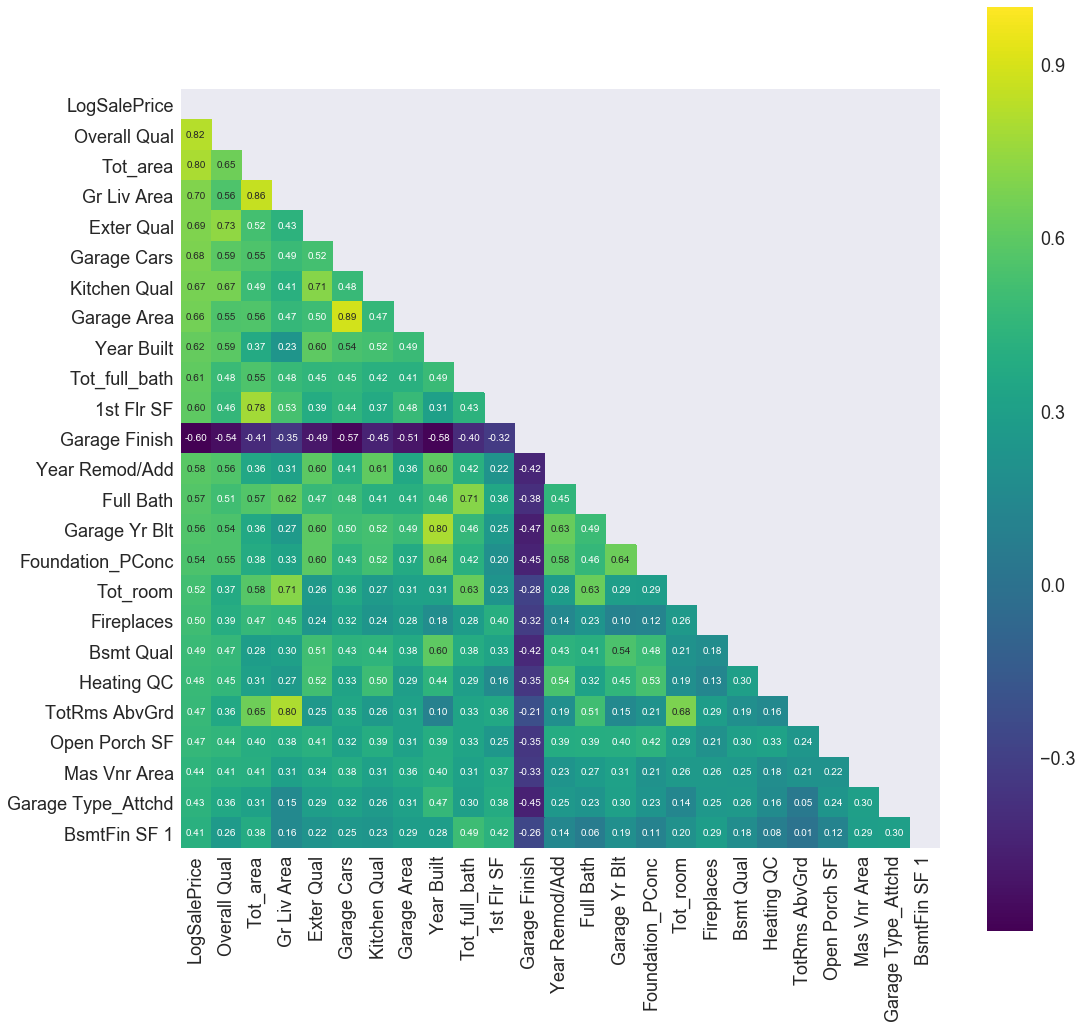

In [79]:
# Apply CorrMat() to Df_Train to get an overview of correlation with y and collinearity between undependent variables
CorrMat(df_Train,'LogSalePrice' ,25);

- I am surprised of the high level of collinearity between the undependent variables.
- This forces us to select modelling algorithms that are robust face to collinearity like Ridge, Lasso, Elsatic net, ...

### Feature Standardization

In [80]:
# Extract and standartize the features using RobustScaler
X_Train = df_Train.drop(['LogSalePrice'], axis=1).values
X_Pred = df_Pred.values
# Create scaler object 
scaler = RobustScaler();
scaler.fit(X_Train); X_Train_scaled = scaler.transform(X_Train)
scaler.fit(X_Pred)
X_Pred_scaled = scaler.transform(X_Pred)
# Extract response
y= df_Train['LogSalePrice'].values

### Split Training data set

In [81]:
# One split 50/50 the training dataset according to the requirement else I would have choosen 80/20
# I did the splitting operation after having filter the outlier on the df_Train (train_df + test_df) is that correct to consider
# test_df data to decide outliers filtering ?
X_tr, X_te, y_tr, y_te = train_test_split(X_Train_scaled, y, train_size=0.5, test_size=0.5, random_state=0)
print('Train features:', X_tr.shape, 'Train y:', y_tr.shape, '\nTest features:', X_te.shape,  'Test y:', y_te.shape)

Train features: (1192, 176) Train y: (1192,) 
Test features: (1193, 176) Test y: (1193,)


### 1. Simple Model
- With two variables only
- I will use the correlation matrix to select them

In [82]:
# Select two variable upon the correlation matrix
# -> Overall Qual & Tot_area
df_Train_2=df_Train[['Overall Qual','Tot_area']]
# Extract and standartize the features using RobustScaler
X_Train_2 = df_Train_2.values
# Create scaler object 
scaler.fit(X_Train_2); X_Train_2_scaled = scaler.transform(X_Train_2)
# One split 50/50 the training dataset according to the requirement else I would have choosen 80/20
X2_tr, X2_te, y_tr, y_te = train_test_split(X_Train_2_scaled, y, train_size=0.5, test_size=0.5, random_state=0)
print('Train features:', X2_tr.shape, 'Train y:', y_tr.shape, '\nTest features:', X2_te.shape,  'Test y:', y_te.shape)

Train features: (1192, 2) Train y: (1192,) 
Test features: (1193, 2) Test y: (1193,)


In [83]:
# Create a simple linear regression
lr_simple = LinearRegression()
# Fit coefficients
lr_simple = lr_simple.fit(X2_tr, y_tr)
# Generate prediction for train and test sets
y_tr_simple_p = lr_simple.predict(X2_tr)
y_te_simple_p = lr_simple.predict(X2_te)
# Calculate MAEs
MAE_simple_tr_p=MAE(10**y_tr, 10**y_tr_simple_p)
MAE_simple_te_p=MAE(10**y_te, 10**y_te_simple_p)

# Our y_tr, y_te are already log10 transformed then yat is also log10 transformed we can simply use the sqrt(MSE)
print('RMSLE:\ntrain: {:.3f}'.format(np.sqrt(MSE(y_tr,y_tr_simple_p))), 'test: {:.3f}'.format(np.sqrt(MSE(y_te,y_te_simple_p))))
# For the MAE we need to transform back to the initial units then 10**log10(x)=x
print('MAE of SalePrice:\ntrain: {:.0f}'.format(MAE_simple_tr_p), 'test: {:.0f}'.format(MAE_simple_te_p))
# Generate the score R2 for each sets
print('R2 score:\ntrain:{:.2f}'.format(lr_simple.score(X2_tr, y_tr)), 'test:{:.2f}'.format(lr_simple.score(X2_te, y_te)))

RMSLE:
train: 0.073 test: 0.078
MAE of SalePrice:
train: 21230 test: 22927
R2 score:
train:0.80 test:0.78


- For a simple Linear Regression I am surprized by the so high score R2.
- Overall Qual & Tot_area present a high collinearity of 0.64 but this does not affect the test score much.

In [ ]:
# Cearte X1
X1 = np.c_[np.ones(X_Train_2.shape[0]), X_Train_2] # Create X1 matrix
# Condition number
# What is the threshold to say it's unstable ? 30 ?
cn = np.linalg.cond(X1)
print('Condition number: {:.0f}'.format(cn))

- Here we see that the model is unstable. We need to use Regularization.

### 2. Intermediate Model
- between 10 and 20 variables
- I will use the correlation matrix to select them

In [68]:
# Select 20 of the highest correlation with LogSalePrice
Corr_abs = np.abs(df_Train.corr().filter(['LogSalePrice'])).sort_values(by='LogSalePrice',ascending=False)
Features_20 = Corr_abs.drop('LogSalePrice').head(20).index.tolist()
Features_20

['Overall Qual',
 'Tot_area',
 'Gr Liv Area',
 'Exter Qual',
 'Garage Cars',
 'Kitchen Qual',
 'Garage Area',
 'Year Built',
 'Tot_full_bath',
 '1st Flr SF',
 'Garage Finish',
 'Year Remod/Add',
 'Full Bath',
 'Garage Yr Blt',
 'Foundation_PConc',
 'Tot_room',
 'Fireplaces',
 'Bsmt Qual',
 'Heating QC',
 'TotRms AbvGrd']

In [69]:
# Select two variable upon the correlation matrix
# -> Features_20
df_Train_3 = df_Train.filter(Features_20)
# Extract and standartize the features using RobustScaler
X_Train_3 = df_Train_3.values
# Create scaler object 
scaler.fit(X_Train_3); X_Train_3_scaled = scaler.transform(X_Train_3)
# One split 50/50 the training dataset according to the requirement else I would have choosen 80/20
X3_tr, X3_te, y_tr, y_te = train_test_split(X_Train_3_scaled, y, train_size=0.5, test_size=0.5, random_state=0)
print('Train features:', X3_tr.shape, 'Train y:', y_tr.shape, '\nTest features:', X3_te.shape,  'Test y:', y_te.shape)
#df_Train_3.head()

Train features: (1192, 20) Train y: (1192,) 
Test features: (1192, 20) Test y: (1192,)


In [70]:
# Create a simple linear regression
lr_int = LinearRegression()
# Fit coefficients
lr_int = lr_int.fit(X3_tr, y_tr)
# Generate prediction for train and test sets
y_tr_int_p = lr_int.predict(X3_tr); y_te_int_p = lr_int.predict(X3_te)
# Calculate MAEs
MAE_int_tr = MAE(10**y_tr, 10**y_tr_int_p); MAE_int_te = MAE(10**y_te, 10**y_te_int_p)

# Our y_tr, y_te are already log10 transformed then yat is also log10 transformed we can simply use the sqrt(MSE)
print('RMSLE:\ntrain: {:.3f}'.format(np.sqrt(MSE(y_tr, y_tr_int_p))), 'test: {:.3f}'.format(np.sqrt(MSE(y_te, y_te_int_p))))
# For the MAE we need to transform back to the initial units then 10**log10(x)=x
print('MAE of SalePrice:\ntrain: {:.0f}'.format(MAE_int_tr), 'test: {:.0f}'.format(MAE_int_te))
# Generate the score R2 for each sets
print('R2 score:\ntrain:{:.5f}'.format(lr_int.score(X3_tr, y_tr)), 'test:{:.5f}'.format(lr_int.score(X3_te, y_te)))

RMSLE:
train: 0.054 test: 0.065
MAE of SalePrice:
train: 16268 test: 18114
R2 score:
train:0.89051 test:0.85365


- For a simple Linear Regression I am surprized by the so high score R2. Still surprized to not see any issue with collinearity.
- Does that model suffer from ill-conditionning ?

### Check ill-Conditioning

In [71]:
# Cearte X1
X1 = np.c_[np.ones(X_Train_3.shape[0]), X_Train_3] # Create X1 matrix
# Condition number
cn = np.linalg.cond(X1)
print('Condition number: {:.0f}'.format(cn))

Condition number: 817945


- Here we see that the model is unstable. It was predictable regarding the correlation Matrix. We need to use Regularization.

### 2.1 Intermediate Model Robust
- Between 10 and 20 variables
- I will use the correlation matrix to select them & Regularization algorithm.

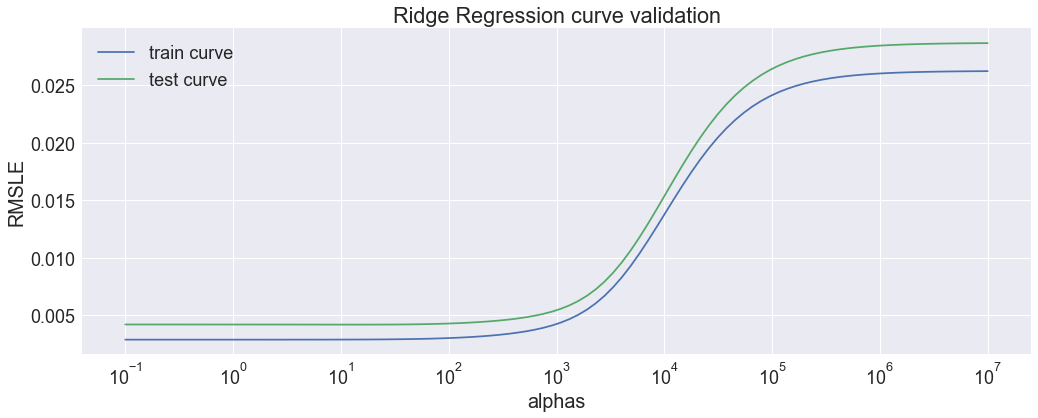

In [78]:
# Save error on train/test sets
train_scores = []; test_scores = []
# Define a set of alpha values
alphas = np.logspace(-1, 7, num=100)
# Grid search
for alpha in alphas:
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha); ridge.fit(X3_tr, y_tr)
    # Performance on train set
    y_tr_int_R_p = ridge.predict(X3_tr); train_mse = MSE(y_tr, y_tr_int_R_p); train_scores.append(train_mse)
    # Performance on test set
    y_te_int_R_p = ridge.predict(X3_te); test_mse = MSE(y_te, y_te_int_R_p); test_scores.append(test_mse)
# Arrange graphic
fig = plt.figure(figsize=(17,6)); #plt.ylim(0, 0.03)
# Plot the validation curves
plt.semilogx(alphas, train_scores, label='train curve'); plt.semilogx(alphas, test_scores, label='test curve')
plt.title('Ridge Regression curve validation'); plt.xlabel('alphas'); plt.ylabel('RMSLE'); plt.legend();

- This curves seems me strange. I was expecting something less smooth. I am really right with it ???

In [75]:
# Find best alpha regarding RMSLE metric
idx = np.argmin(test_scores)
best_alpha_RMSLE = alphas[idx]; best_score = test_scores[idx]
print('Best alpha RMSLE value {:.3e} with score {:.4f}'.format(best_alpha_RMSLE, best_score))

Best alpha RMSLE value 1.024e+01 with score 0.0042


- 10^1< 3.511e+01=35.11 <10^2 -> best alpha calculated seems not to match the curves that suggest more 10^3< best alpha<10^4 !?!
- This region of the curves does not reach a score of RMSLE = 0.0038 !?!?
- Am I right with my code ? I am wondering if I am not plotting the wrong variables ?!?!?

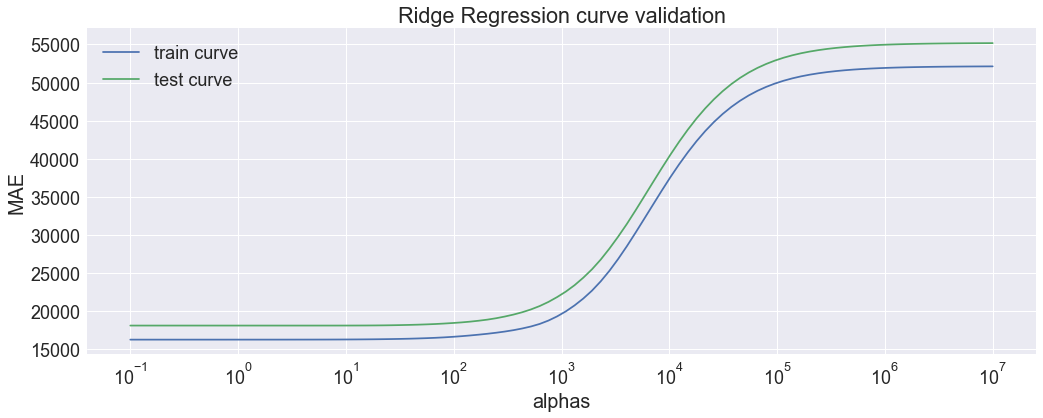

In [80]:
# Save error on train/test sets
train_scores2 = []; test_scores2 = []
# Define a set of alpha values
alphas2 = np.logspace(-1, 7, num=100)
# Grid search
for alpha2 in alphas2:
    # Create and fit ridge regression
    ridge2 = Ridge(alpha=alpha2); ridge2.fit(X3_tr, y_tr)
    # Performance on train set
    y_tr_int_R_p = ridge2.predict(X3_tr); MAE_int_R_tr = MAE(10**y_tr, 10**y_tr_int_R_p); train_scores2.append(MAE_int_R_tr)
    # Performance on test set
    y_te_int_R_p = ridge2.predict(X3_te); MAE_int_R_te = MAE(10**y_te, 10**y_te_int_R_p); test_scores2.append(MAE_int_R_te)
# Arrange graphic
fig = plt.figure(figsize=(17,6)); #plt.ylim(10000, 60000)
# Plot the validation curves
plt.semilogx(alphas2, train_scores2, label='train curve'); plt.semilogx(alphas2, test_scores2, label='test curve')
plt.title('Ridge Regression curve validation'); plt.xlabel('alphas'); plt.ylabel('MAE'); plt.legend();

- This curves seems me strange. I was expecting best alpha MAE close to best alpha for RMSLE. I am really right with it ???
- Are train_scores, test_scores, alpha, alphas, idx, local variables ? I the doubt I added an indice '2' to be sure they will not interact with the initial ones.

In [81]:
# Find best alpha regarding MAE metric
idx2 = np.argmin(test_scores2)
best_alpha_MAE = alphas2[idx2]; best_score2 = test_scores2[idx2]
print('Best alpha MAE value {:.3e} with score {:.0f}'.format(best_alpha_MAE, best_score2))

Best alpha MAE value 3.430e+00 with score 18113


In [82]:
# Fit Ridge regression with Best alpha RMSLE
ridge = Ridge(best_alpha_RMSLE); ridge.fit(X3_tr, y_tr)
# Generate prediction for train and test sets
y_tr_int_R_p = ridge.predict(X3_tr); y_te_int_R_p = ridge.predict(X3_te)
# Calculate MAEs
MAE_int_R_tr = MAE(10**y_tr, 10**y_tr_int_R_p); MAE_int_R_te = MAE(10**y_te, 10**y_te_int_R_p)
# Our y_tr, y_te are already log10 transformed then yat is also log10 transformed we can simply use the sqrt(MSE)
print('RMSLE:\ntrain: {:.3f}'.format(np.sqrt(MSE(y_tr, y_tr_int_R_p))), 'test: {:.3f}'.format(np.sqrt(MSE(y_te, y_te_int_R_p))))
# For the MAE we need to transform back to the initial units then 10**log10(x)=x
print('MAE of SalePrice:\ntrain: {:.0f}'.format(MAE_int_R_tr), 'test: {:.0f}'.format(MAE_int_R_te))
# Generate the score R2 for each sets
print('R2 score:\ntrain:{:.5f}'.format(ridge.score(X3_tr, y_tr)), 'test:{:.5f}'.format(ridge.score(X3_te, y_te)))

RMSLE:
train: 0.054 test: 0.065
MAE of SalePrice:
train: 16288 test: 18116
R2 score:
train:0.89033 test:0.85399


- The Ridge did not penalize too much the scores. In fact I am surprized to be so close of the simple regression. If it's correct, it means the Regularization did not cost a lot on model precision.

### 3 Complex Model Robust
- All variables

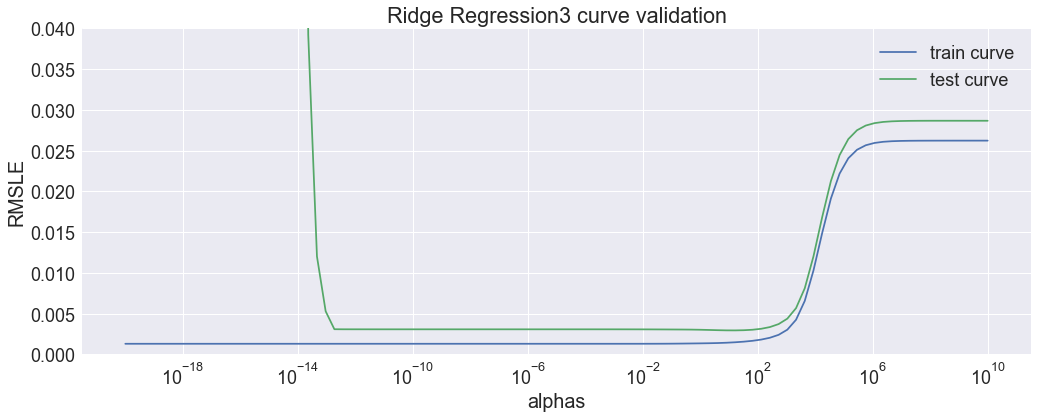

In [89]:
# Save error on train/test sets
train_scores3 = []; test_scores3 = []
# Define a set of alpha values
alphas3 = np.logspace(-20, 10, num=100)
# Filter warnings for better display on Github
warnings.filterwarnings("ignore")
# Grid search
for alpha3 in alphas3:
    # Create and fit ridge regression
    ridge3 = Ridge(alpha=alpha3); ridge3.fit(X_tr, y_tr)
    # Performance on train set
    y_tr_cpx_R_p = ridge3.predict(X_tr); train_mse3 = MSE(y_tr, y_tr_cpx_R_p); train_scores3.append(train_mse3)
    # Performance on test set
    y_te_cpx_R_p = ridge3.predict(X_te); test_mse3 = MSE(y_te, y_te_cpx_R_p); test_scores3.append(test_mse3)
# Arrange graphic
fig = plt.figure(figsize=(17,6)); plt.ylim(0, 0.04)
# Plot the validation curves
plt.semilogx(alphas3, train_scores3, label='train curve'); plt.semilogx(alphas3, test_scores3, label='test curve')
plt.title('Ridge Regression3 curve validation'); plt.xlabel('alphas'); plt.ylabel('RMSLE'); plt.legend();

- This curves seems me more as expected. :)

In [85]:
# Find best alpha RMSLE
idx3 = np.argmin(test_scores3)
best_alpha_RMSLE3 = alphas3[idx3]; best_score3 = test_scores3[idx3]
print('Best alpha RMSLE value {:.3e} with score {:.4f}'.format(best_alpha_RMSLE3, best_score3))

Best alpha RMSLE value 1.024e+01 with score 0.0030


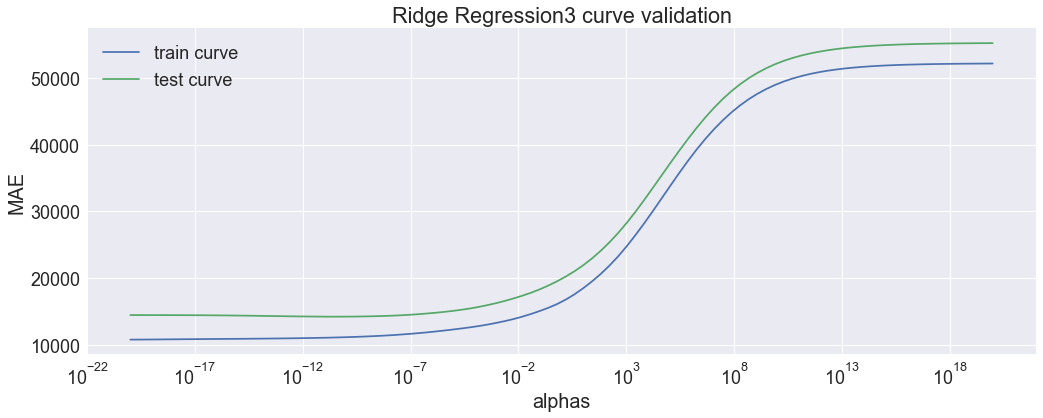

In [90]:
# Save error on train/test sets
train_scores4 = []; test_scores4 = []
# Define a set of alpha values
alphas4 = np.logspace(-20, 20, num=100)
# Grid search
for alpha4 in alphas:
    # Create and fit ridge regression
    ridge4 = Ridge(alpha=alpha4); ridge4.fit(X_tr, y_tr)
    # Performance on train set
    y_tr_cpx_R_p = ridge4.predict(X_tr); MAE_cpx_R_tr = MAE(10**y_tr, 10**y_tr_cpx_R_p); train_scores4.append(MAE_cpx_R_tr)
    # Performance on test set
    y_te_cpx_R_p = ridge4.predict(X_te); MAE_cpx_R_te = MAE(10**y_te, 10**y_te_cpx_R_p); test_scores4.append(MAE_cpx_R_te)
# Arrange graphic
fig = plt.figure(figsize=(17,6)); #plt.ylim(0, 75000)
# Plot the validation curves
plt.semilogx(alphas4, train_scores4, label='train curve'); plt.semilogx(alphas4, test_scores4, label='test curve')
plt.title('Ridge Regression3 curve validation'); plt.xlabel('alphas'); plt.ylabel('MAE'); plt.legend();

In [91]:
# Find best alpha MAE
idx4 = np.argmin(test_scores4)
best_alpha_MAE4 = alphas4[idx4]; best_score4 = test_scores4[idx4]
print('Best alpha MAE value {:.3e} with score {:.4f}'.format(best_alpha_MAE4, best_score4))

Best alpha MAE value 1.963e-11 with score 14280.0742


- This curves seems me strange. I was expecting alpha having an impact on MAE close to best alpha for RMSLE. Apparently one must choose one metric to minimize not two.
- Are train_scores, test_scores, alpha local variables ? I the doubt I added a '2' to be sure they will not interact with the initial ones.

In [92]:
# Fit Ridge regression with Best alpha
ridge3 = Ridge(best_alpha_RMSLE3); ridge3.fit(X_tr, y_tr)
# Generate prediction for train and test sets
y_tr_cpx_R_p = ridge3.predict(X_tr); y_te_cpx_R_p = ridge3.predict(X_te)
# Calculate MAEs
MAE_cpx_R_tr = MAE(10**y_tr, 10**y_tr_cpx_R_p); MAE_cpx_R_te = MAE(10**y_te, 10**y_te_cpx_R_p)
# Our y_tr, y_te are already log10 transformed then yat is also log10 transformed we can simply use the sqrt(MSE)
print('RMSLE:\ntrain: {:.3f}'.format(np.sqrt(MSE(y_tr, y_tr_cpx_R_p))), 'test: {:.3f}'.format(np.sqrt(MSE(y_te, y_te_cpx_R_p))))
# For the MAE we need to transform back to the initial units then 10**log10(x)=x
print('MAE of SalePrice:\ntrain: {:.0f}'.format(MAE_cpx_R_tr), 'test: {:.0f}'.format(MAE_cpx_R_te))
# Generate the score R2 for each sets
print('R2 score:\ntrain:{:.5f}'.format(ridge3.score(X_tr, y_tr)), 'test:{:.5f}'.format(ridge3.score(X_te, y_te)))

RMSLE:
train: 0.038 test: 0.054
MAE of SalePrice:
train: 11218 test: 14285
R2 score:
train:0.94454 test:0.89684


- The Ridge did not penalize too much the scores. In fact I am surprized to be so close of the simple regression. If it's correct, it means the Regularization did not cost a lot on model precision.

### 3.1 Complex Model Robust with Lasso
- All variables

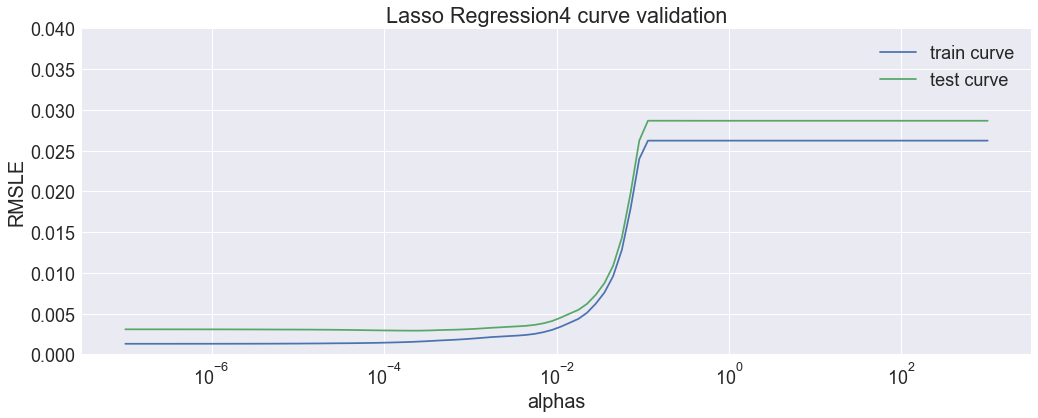

In [95]:
# Save error on train/test sets
train_scores5 = []; test_scores5 = []
# Define a set of alpha values
alphas5 = np.logspace(-7, 3, num=100)
# Filter warnings for better display on Github
#warnings.filterwarnings("ignore")
# Grid search
for alpha5 in alphas5:
    # Create and fit lasso regression
    lasso = Lasso(alpha=alpha5, max_iter=50000); lasso.fit(X_tr, y_tr)
    # Performance on train set
    y_tr_cpx_L_p = lasso.predict(X_tr); train_mse5 = MSE(y_tr, y_tr_cpx_L_p); train_scores5.append(train_mse5)
    # Performance on test set
    y_te_cpx_L_p = lasso.predict(X_te); test_mse5 = MSE(y_te, y_te_cpx_L_p); test_scores5.append(test_mse5)
# Arrange graphic
fig = plt.figure(figsize=(17,6)); plt.ylim(0, 0.04)
# Plot the validation curves
plt.semilogx(alphas5, train_scores5, label='train curve'); plt.semilogx(alphas5, test_scores5, label='test curve')
plt.title('Lasso Regression4 curve validation'); plt.xlabel('alphas'); plt.ylabel('RMSLE'); plt.legend();

In [96]:
# Find best alpha RMSLE
idx5 = np.argmin(test_scores5)
best_alpha_RMSLE5 = alphas5[idx5]; best_score5 = test_scores5[idx5]
print('Best alpha RMSLE value {:.3e} with score {:.4f}'.format(best_alpha_RMSLE5, best_score5))

Best alpha RMSLE value 2.154e-04 with score 0.0029


- This curves seems me strange. What happen at 10^-1 ?

In [ ]:
# Fit Lasso regression with Best alpha
lasso = Lasso(alpha=best_alpha_RMSLE5, max_iter=30000); lasso.fit(X_tr, y_tr)
# Generate prediction for train and test sets
y_tr_cpx_L_p = lasso.predict(X_tr); y_te_cpx_L_p = lasso.predict(X_te);
# Calculate MAEs
MAE_cpx_L_tr = MAE(10**y_tr, 10**y_tr_cpx_L_p); MAE_cpx_L_te = MAE(10**y_te, 10**y_te_cpx_L_p)
# Our y_tr, y_te are already log10 transformed then yat is also log10 transformed we can simply use the sqrt(MSE)
print('RMSLE:\ntrain: {:.3f}'.format(np.sqrt(MSE(y_tr, y_tr_cpx_L_p))), 'test: {:.3f}'.format(np.sqrt(MSE(y_te, y_te_cpx_L_p))))
# For the MAE we need to transform back to the initial units then 10**log10(x)=x
print('MAE of SalePrice:\ntrain: {:.0f}'.format(MAE_cpx_L_tr), 'test: {:.0f}'.format(MAE_cpx_L_te))
# Generate the score R2 for each sets
print('R2 score:\ntrain:{:.5f}'.format(lasso.score(X_tr, y_tr)), 'test:{:.5f}'.format(lasso.score(X_te, y_te)))

- I did not do better than the Ridge3.

# Model Comparison

In [ ]:
# Generate baseline and compare it to models metrics MAE
def MAE(y, y_pred): # I was trying initially to use the MAE from sklearn.metrics but got an error
    return np.mean(np.abs(y - y_pred)) # TypeError: Singleton array 168382.06521043554 cannot be considered a valid collection.
# Compute MEA baseline 
MAE_base = MAE(10**y_te, 10**np.mean(y_tr))
# Arrange graphic
fig = plt.figure(figsize=(17,8))
plt.bar([1, 2, 3, 4, 5], [MAE_base, MAE_simple_te_p, MAE_int_R_te, MAE_cpx_L_te, MAE_cpx_R_te])
plt.title('MAE on price in dollars'); plt.xlabel('Models metric'); plt.ylabel('Price in $')
plt.xticks([1, 2, 3, 4, 5], ['Mean baseline', 'MAE Simple','MAE Intermediate','MAE Complex Lasso','MAE Complex Ridge']);

# Model Predictions

-  Following instruction form the requirements

In [ ]:
# Predict new prices for df_Pred
predictions = 10**ridge3.predict(X_Pred_scaled)
# Restaure the column PID from index
df_Pred.reset_index(inplace=True)
# Create DataFrame for predictions
predictions_df = pd.DataFrame.from_items([('PID', df_Pred['PID']),('SalePrice', predictions)]) # What is the correct code with DataFrame.from_dict?

In [ ]:
# Verify predictions_df content
print(predictions_df.shape); predictions_df.head()

In [ ]:
# Distribution of the predicted prices
predictions_df.SalePrice.describe()

In [ ]:
# Distribution of the prices in house-prices.csv
(10**(df_Train.LogSalePrice)).describe()

In [ ]:
# Save data
predictions_df.to_csv('house-prices-pred.csv', index=False, float_format='%.0f')

# ---------------------------------------------------------------------------------------------------------------

# -------------------------------------- DATA MODELLING end --------------------------------------

# ---------------------------------------------------------------------------------------------------------------